In [1]:
import os
import glob
import uproot
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import gridspec
from scipy.optimize import curve_fit
import mplhep as hep
plt.style.use(hep.style.CMS)
#import yahist
from tqdm import tqdm
pd.set_option('display.max_columns', None)
from tqdm import tqdm
pd.set_option('display.max_rows', 500)

In [2]:
inputDir = '/afs/cern.ch/work/m/mmazza/private/projects/HGCElectronicsValidation/CMSSW_13_1_0_pre4/src/UserCode/HGCElectronicsValidation/'
plot_dir = inputDir+"/plots/output_numEvent500/"
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)
infile = inputDir+'output.root'

In [6]:
tileboards=[[34,'J8',1,18,25,1,False], 
            [34,'K4',1,26,29,2,True], 
            [35,'J8',1,18,25,3,False], 
            [35,'K6',1,26,31,4,True], 
            [36,'J8',1,18,25,1,False], 
            [36,'K7',1,26,33,2,True],
            [37,'J8',1,18,25,3,False],
            [37,'K7',1,26,33,4,True],
            [38,'C5',1,13,17,1,False],
            [38,'D8',1,18,25,2,False],
            [38,'E8',1,26,33,3,False],
            [38,'G3',1,34,37,4,True],
            [39,'C5',1,13,17,1,False],
            [39,'D8',1,18,25,2,False],
            [39,'E8',1,26,33,3,False],
            [39,'G4',1,34,39,4,True],
            [40,'B11B12',2,6,17,1,False],
            [40,'D8',1,18,25,2,False],
            [40,'E8',1,26,33,3,False],
            [40,'G8',1,34,41,4,True],
            [41,'B11B12',2,6,17,1,False],
            [41,'D8',1,18,25,2,False],
            [41,'E8',1,26,33,3,False],
            [41,'G8',1,34,41,4,True],
            [42,'B11B12',2,6,17,1,False],
            [42,'D8',1,18,25,2,False],
            [42,'E8',1,26,33,3,False],
            [42,'G8',1,34,41,4,True],
            [43,'B11B12',2,6,17,1,False],
            [43,'D8',1,18,25,2,False],
            [43,'E8',1,26,33,3,False],
            [43,'G8',1,34,41,4,True],            
            [44,'A5A6',1,0,5,1,False],
            [44,'B12',2,6,17,2,False],
            [44,'D8',1,18,25,3,False],
            [44,'E8',1,26,33,4,False],
            [44,'G8',1,34,41,5,True],           
            [45,'A5A6',1,0,5,1,False],
            [45,'B12',2,6,17,2,False],
            [45,'D8',1,18,25,3,False],
            [45,'E8',1,26,33,4,False],
            [45,'G8',1,34,41,5,True],
            [46,'A5A6',1,0,5,1,False],
            [46,'B12',2,6,17,2,False],
            [46,'D8',1,18,25,3,False],
            [46,'E8',1,26,33,4,False],
            [46,'G8',1,34,41,5,True],
            [47,'A5A6',1,0,5,1,False],
            [47,'B12',2,6,17,2,False],
            [47,'D8',1,18,25,3,False],
            [47,'E8',1,26,33,4,False],
            [47,'G6',1,34,39,5,True],
           ]

# Build histogram from TTree of individual TileBoards

In [3]:
with uproot.open(infile) as f:    
    df_tree = f["ana/ntuple"].arrays(library="pd")


/cvmfs/sft.cern.ch/lcg/views/LCG_104/x86_64-el9-gcc13-opt/lib/python3.9/site-packages/uproot/interpretation/library.py:805: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  out[name] = series[name]
/cvmfs/sft.cern.ch/lcg/views/LCG_104/x86_64-el9-gcc13-opt/lib/python3.9/site-packages/uproot/interpretation/library.py:805: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  out[name] = series[name]
/cvmfs/sft.cern.ch/lcg/views/LCG_104/x86_64-el9-gcc13-opt/lib/python3.9/site-packages/uproot/interpretation/library.py:805: PerformanceWarning: 

In [7]:
labels = {
    "toaHits": "TOA Hits",
    "tdcHits": "TDC Hits",
    "adcHits": "ADC Hits",
}
vars_to_plot = list(labels.keys())

In [9]:
def plot1DHist(df_, var_, color="black",label=None,output_file_name=None):
    
    # build histogram
    xmin = df_[var_].min()
    xmax = df_[var_].max()
    nbins = xmax-xmin+1
    hist, bins = np.histogram(df_[var_], bins=nbins, range=(xmin, xmax))
    bin_width = bins[1] - bins[0]
    bin_centers = (bins[:-1] + bins[1:]) / 2
    
    # stat errors
    xerrs = [bin_width * 0.5 for i in range(0, nbins)]
    yerrs = np.sqrt(hist)
    
    #plot
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.errorbar(
       bin_centers,
       hist,
       xerr=xerrs,
       yerr=yerrs,
       linestyle="None",
       color=color,
       marker="o",
       label=label
    )
    
    # Axes titles
#     ax.set_title(
#        "$ \sqrt{s} = 14$ TeV", #, L = 2.3 $fb^{-1}$; \n",
#        fontsize=15,
#     )
    ax.set_title(
       var_.split("_")[0]+var_.split("_")[1], #, L = 2.3 $fb^{-1}$; \n",
       fontsize=20,
    )

    ax.set_xlabel(labels[var_.split("_")[-1]], fontsize=20)
    ax.set_ylabel("Counts", fontsize=20)
    ax.set_xlim(xmin, xmax)

    ax.legend(fontsize=15)
    hep.cms.label(
        "Preliminary",
        data=False,
        loc=0,
        ax=ax,
        rlabel="$ \sqrt{s} = 14$ TeV",
        fontsize=15
    )
    
    if output_file_name:
        plt.savefig(plot_dir+output_file_name+".pdf", bbox_inches="tight");



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L34_J8_toaHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L34_J8_tdcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L34_J8_adcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L34_K4_toaHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L34_K4_tdcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L34_K4_adcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L35_J8_toaHits


/tmp/mmazza/ipykernel_904061/816994553.py:40: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(xmin, xmax)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L35_J8_tdcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L35_J8_adcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L35_K6_toaHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L35_K6_tdcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L35_K6_adcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L36_J8_toaHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L36_J8_tdcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L36_J8_adcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L36_K7_toaHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L36_K7_tdcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L36_K7_adcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L37_J8_toaHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L37_J8_tdcHits


/tmp/mmazza/ipykernel_904061/816994553.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(10, 8))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L37_J8_adcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L37_K7_toaHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L37_K7_tdcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L37_K7_adcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L38_C5_toaHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L38_C5_tdcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L38_C5_adcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L38_D8_toaHits


/tmp/mmazza/ipykernel_904061/816994553.py:40: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(xmin, xmax)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L38_D8_tdcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L38_D8_adcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L38_E8_toaHits


/tmp/mmazza/ipykernel_904061/816994553.py:40: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(xmin, xmax)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L38_E8_tdcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L38_E8_adcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L38_G3_toaHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L38_G3_tdcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L38_G3_adcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L39_C5_toaHits


/tmp/mmazza/ipykernel_904061/816994553.py:40: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(xmin, xmax)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L39_C5_tdcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L39_C5_adcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L39_D8_toaHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L39_D8_tdcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L39_D8_adcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L39_E8_toaHits


/tmp/mmazza/ipykernel_904061/816994553.py:40: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(xmin, xmax)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L39_E8_tdcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L39_E8_adcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L39_G4_toaHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L39_G4_tdcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L39_G4_adcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L40_B11B12_toaHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L40_B11B12_tdcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L40_B11B12_adcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L40_D8_toaHits


/tmp/mmazza/ipykernel_904061/816994553.py:40: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(xmin, xmax)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L40_D8_tdcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L40_D8_adcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L40_E8_toaHits


/tmp/mmazza/ipykernel_904061/816994553.py:40: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(xmin, xmax)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L40_E8_tdcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L40_E8_adcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L40_G8_toaHits


/tmp/mmazza/ipykernel_904061/816994553.py:40: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(xmin, xmax)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L40_G8_tdcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L40_G8_adcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L41_B11B12_toaHits


/tmp/mmazza/ipykernel_904061/816994553.py:40: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(xmin, xmax)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L41_B11B12_tdcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L41_B11B12_adcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L41_D8_toaHits


/tmp/mmazza/ipykernel_904061/816994553.py:40: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(xmin, xmax)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L41_D8_tdcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L41_D8_adcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L41_E8_toaHits


/tmp/mmazza/ipykernel_904061/816994553.py:40: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(xmin, xmax)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L41_E8_tdcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L41_E8_adcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L41_G8_toaHits


/tmp/mmazza/ipykernel_904061/816994553.py:40: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(xmin, xmax)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L41_G8_tdcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L41_G8_adcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L42_B11B12_toaHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L42_B11B12_tdcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L42_B11B12_adcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L42_D8_toaHits


/tmp/mmazza/ipykernel_904061/816994553.py:40: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(xmin, xmax)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L42_D8_tdcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L42_D8_adcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L42_E8_toaHits


/tmp/mmazza/ipykernel_904061/816994553.py:40: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(xmin, xmax)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L42_E8_tdcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L42_E8_adcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L42_G8_toaHits


/tmp/mmazza/ipykernel_904061/816994553.py:40: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(xmin, xmax)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L42_G8_tdcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L42_G8_adcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L43_B11B12_toaHits


/tmp/mmazza/ipykernel_904061/816994553.py:40: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(xmin, xmax)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L43_B11B12_tdcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L43_B11B12_adcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L43_D8_toaHits


/tmp/mmazza/ipykernel_904061/816994553.py:40: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(xmin, xmax)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L43_D8_tdcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L43_D8_adcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L43_E8_toaHits


/tmp/mmazza/ipykernel_904061/816994553.py:40: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(xmin, xmax)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L43_E8_tdcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L43_E8_adcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L43_G8_toaHits


/tmp/mmazza/ipykernel_904061/816994553.py:40: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(xmin, xmax)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L43_G8_tdcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L43_G8_adcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L44_A5A6_toaHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L44_A5A6_tdcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L44_A5A6_adcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L44_B12_toaHits


/tmp/mmazza/ipykernel_904061/816994553.py:40: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(xmin, xmax)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L44_B12_tdcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L44_B12_adcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L44_D8_toaHits


/tmp/mmazza/ipykernel_904061/816994553.py:40: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(xmin, xmax)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L44_D8_tdcHits
L44_D8_adcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L44_E8_toaHits


/tmp/mmazza/ipykernel_904061/816994553.py:40: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(xmin, xmax)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L44_E8_tdcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L44_E8_adcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L44_G8_toaHits


/tmp/mmazza/ipykernel_904061/816994553.py:40: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(xmin, xmax)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L44_G8_tdcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L44_G8_adcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L45_A5A6_toaHits


/tmp/mmazza/ipykernel_904061/816994553.py:40: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(xmin, xmax)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L45_A5A6_tdcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L45_A5A6_adcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L45_B12_toaHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L45_B12_tdcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L45_B12_adcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L45_D8_toaHits


/tmp/mmazza/ipykernel_904061/816994553.py:40: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(xmin, xmax)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L45_D8_tdcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L45_D8_adcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L45_E8_toaHits


/tmp/mmazza/ipykernel_904061/816994553.py:40: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(xmin, xmax)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L45_E8_tdcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L45_E8_adcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L45_G8_toaHits


/tmp/mmazza/ipykernel_904061/816994553.py:40: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(xmin, xmax)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L45_G8_tdcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L45_G8_adcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L46_A5A6_toaHits


/tmp/mmazza/ipykernel_904061/816994553.py:40: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(xmin, xmax)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L46_A5A6_tdcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L46_A5A6_adcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L46_B12_toaHits


/tmp/mmazza/ipykernel_904061/816994553.py:40: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(xmin, xmax)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L46_B12_tdcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L46_B12_adcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L46_D8_toaHits


/tmp/mmazza/ipykernel_904061/816994553.py:40: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(xmin, xmax)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L46_D8_tdcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L46_D8_adcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L46_E8_toaHits


/tmp/mmazza/ipykernel_904061/816994553.py:40: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(xmin, xmax)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L46_E8_tdcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L46_E8_adcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L46_G8_toaHits


/tmp/mmazza/ipykernel_904061/816994553.py:40: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(xmin, xmax)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L46_G8_tdcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L46_G8_adcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L47_A5A6_toaHits


/tmp/mmazza/ipykernel_904061/816994553.py:40: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(xmin, xmax)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L47_A5A6_tdcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L47_A5A6_adcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L47_B12_toaHits


/tmp/mmazza/ipykernel_904061/816994553.py:40: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(xmin, xmax)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L47_B12_tdcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L47_B12_adcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L47_D8_toaHits


/tmp/mmazza/ipykernel_904061/816994553.py:40: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(xmin, xmax)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L47_D8_tdcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L47_D8_adcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L47_E8_toaHits


/tmp/mmazza/ipykernel_904061/816994553.py:40: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(xmin, xmax)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L47_E8_tdcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L47_E8_adcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L47_G6_toaHits


/tmp/mmazza/ipykernel_904061/816994553.py:40: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(xmin, xmax)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L47_G6_tdcHits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L47_G6_adcHits


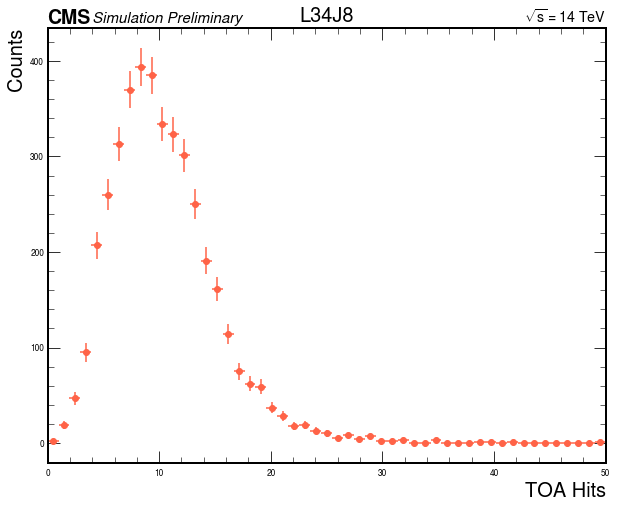

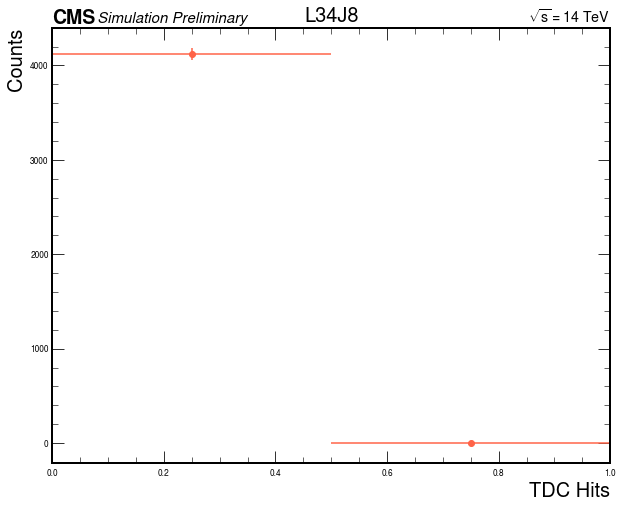

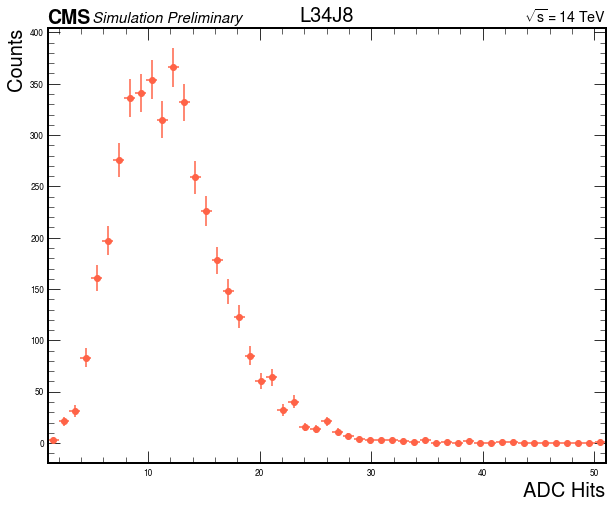

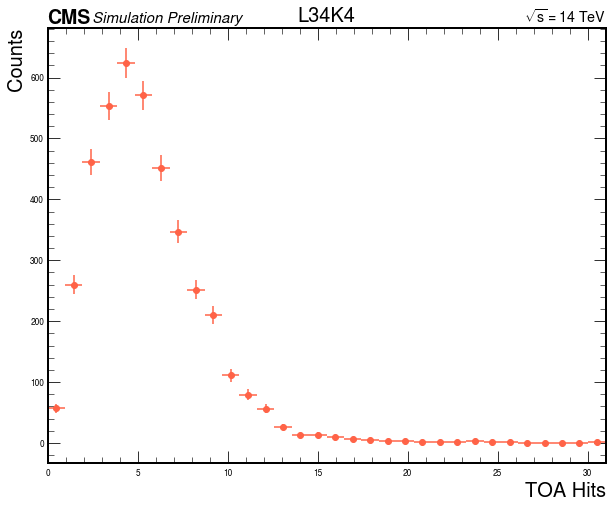

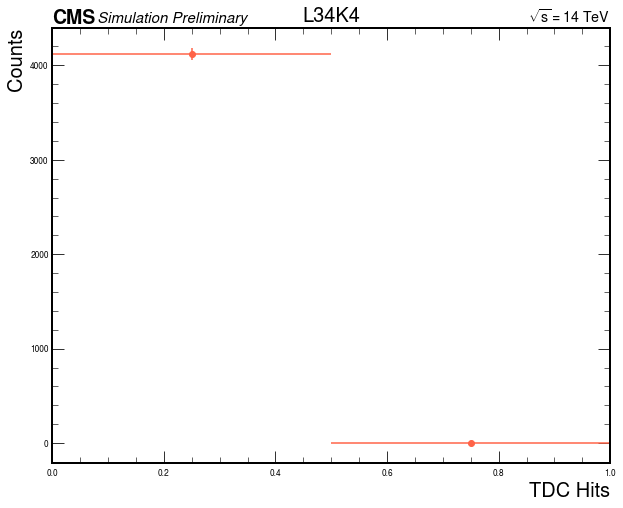

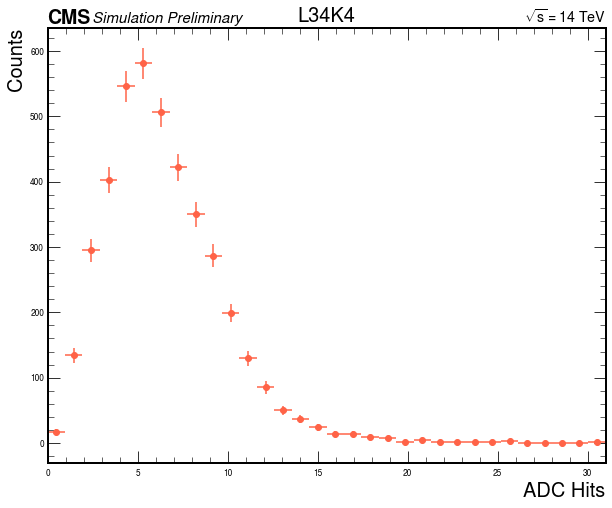

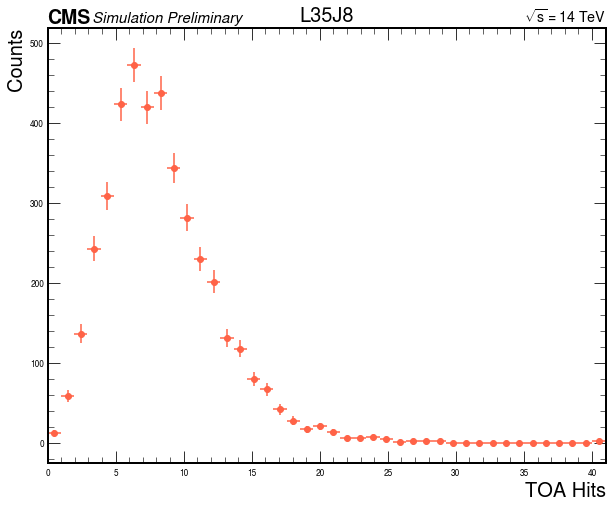

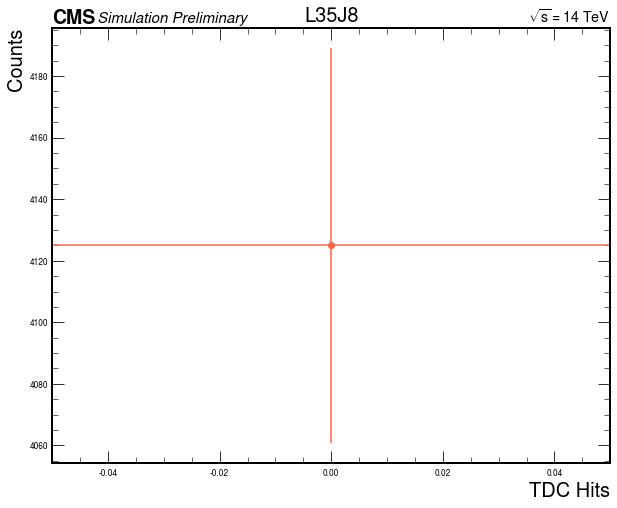

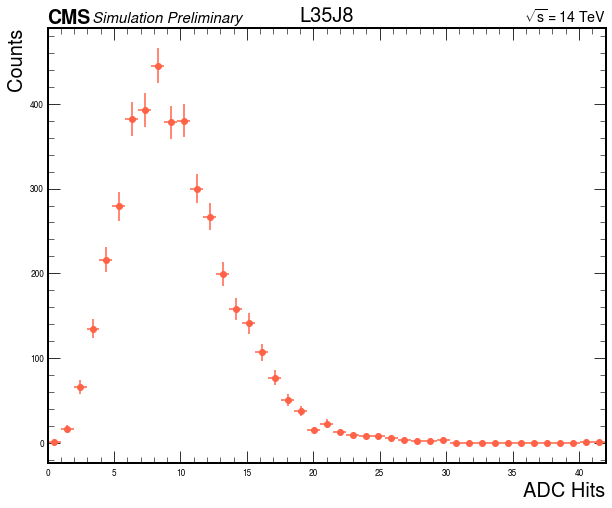

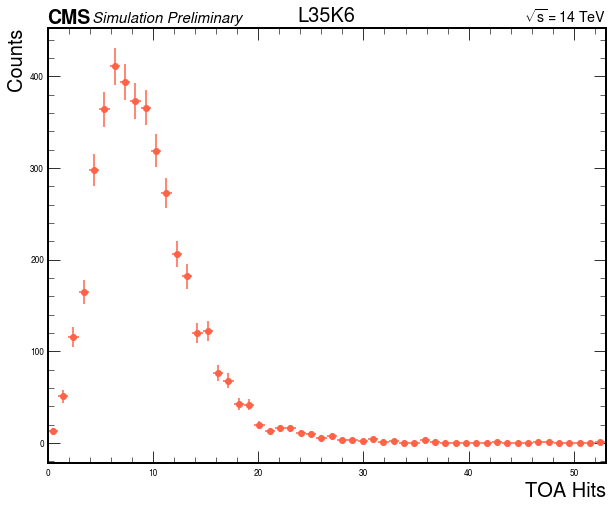

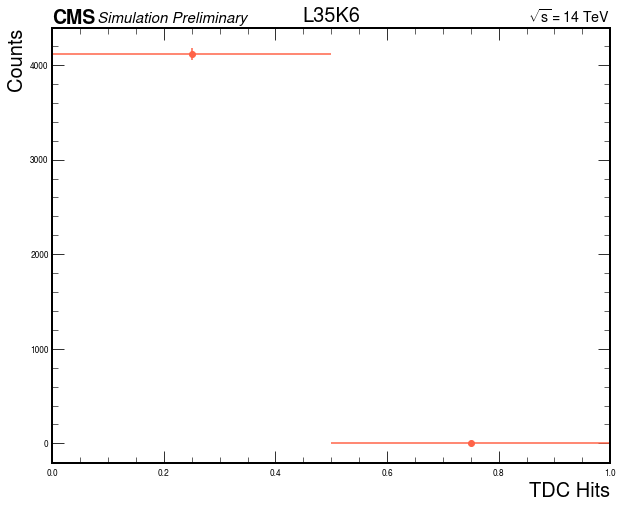

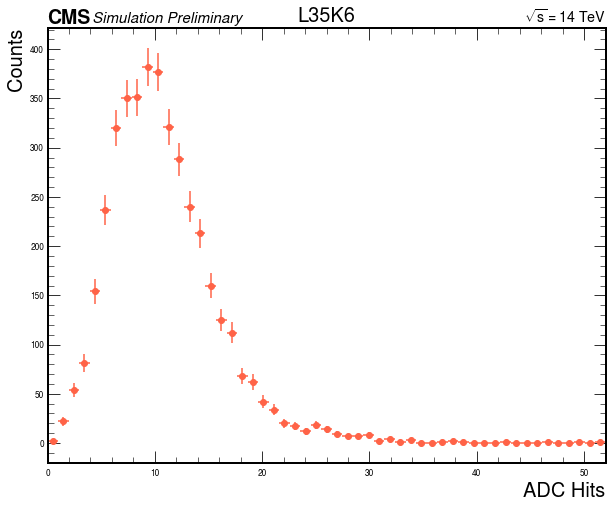

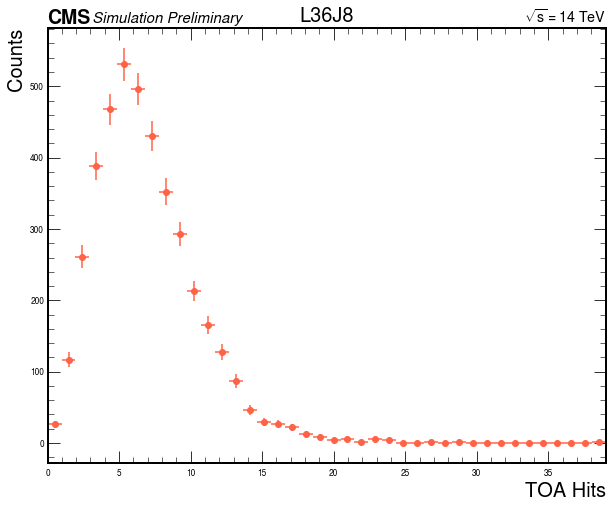

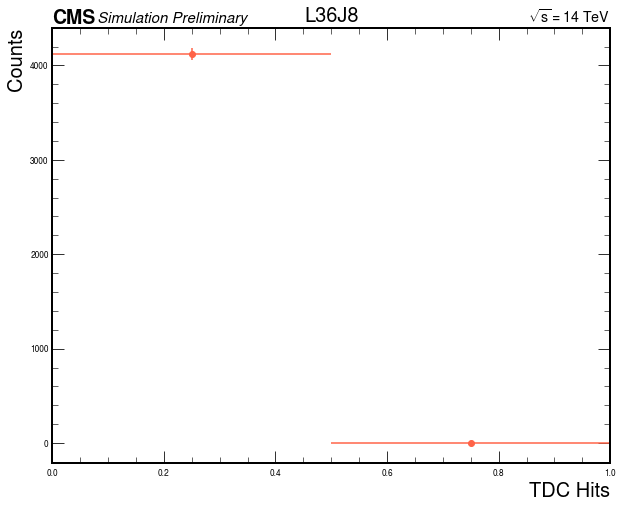

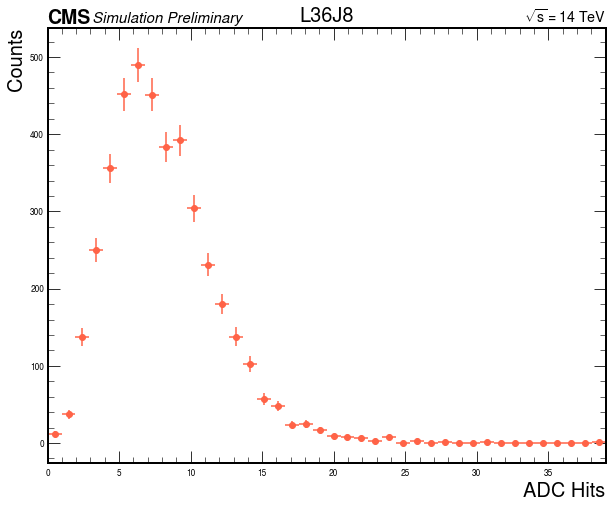

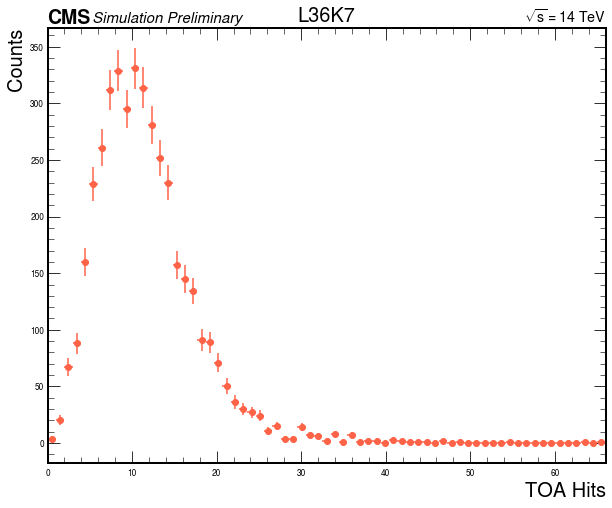

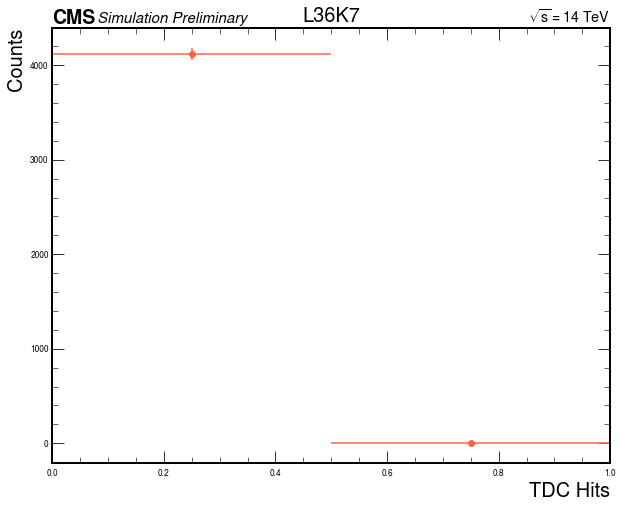

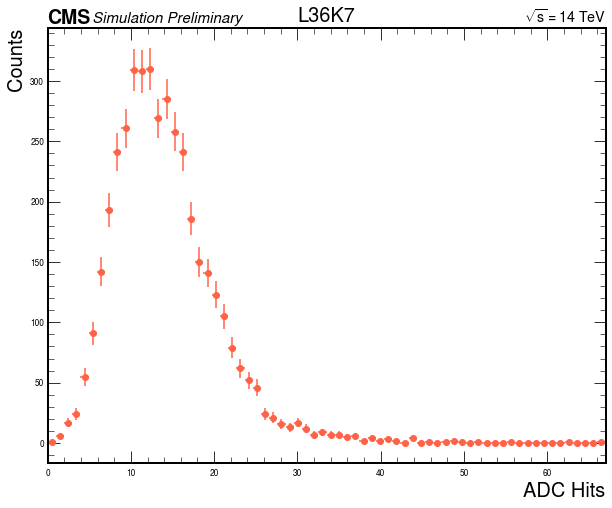

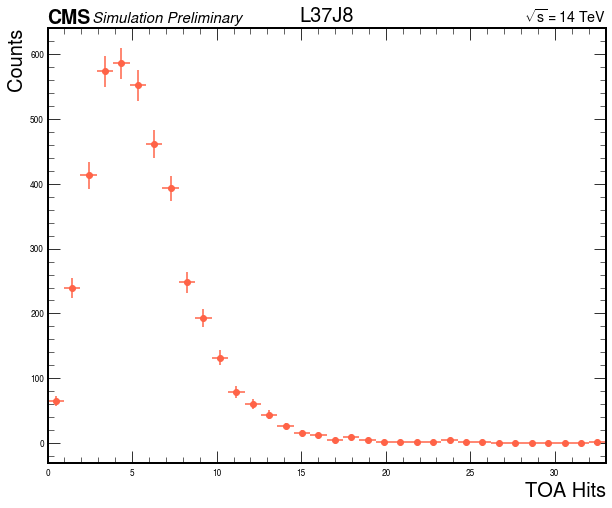

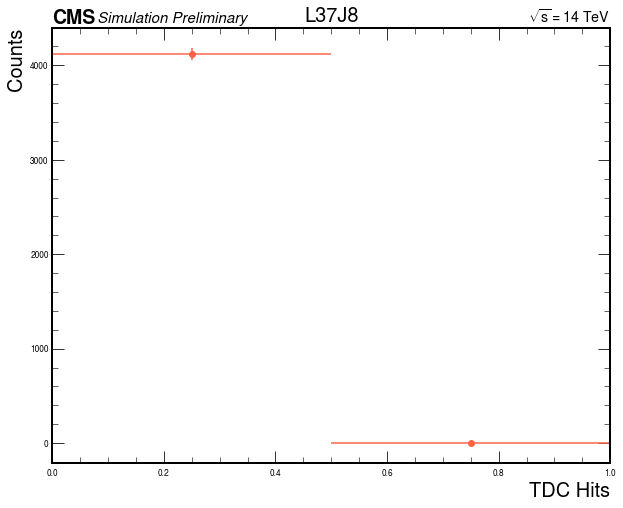

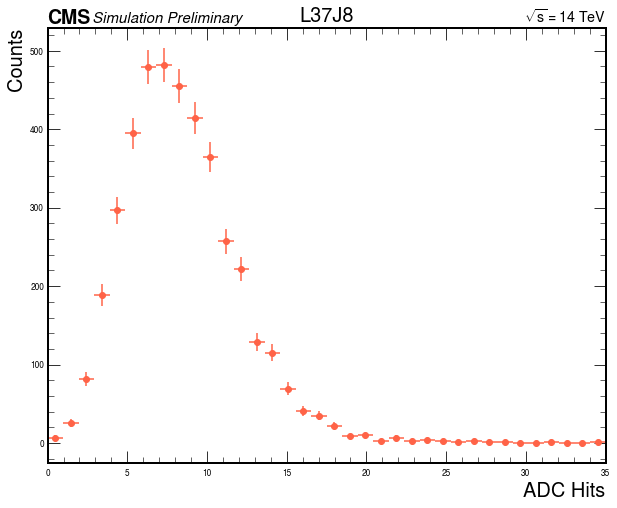

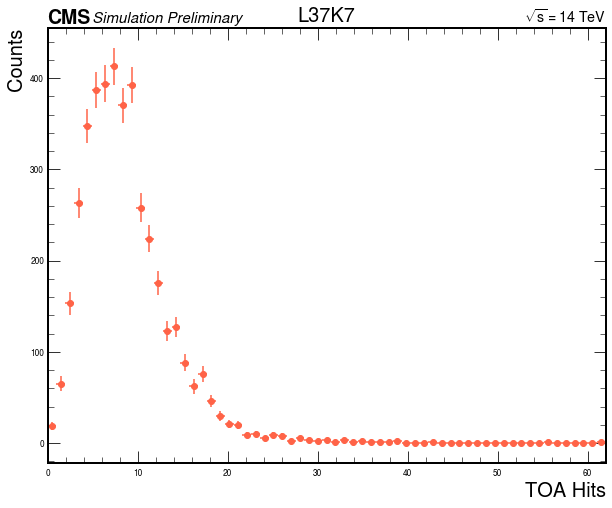

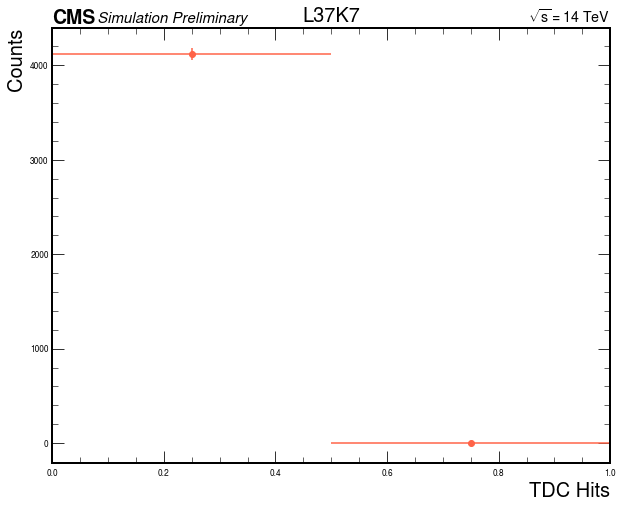

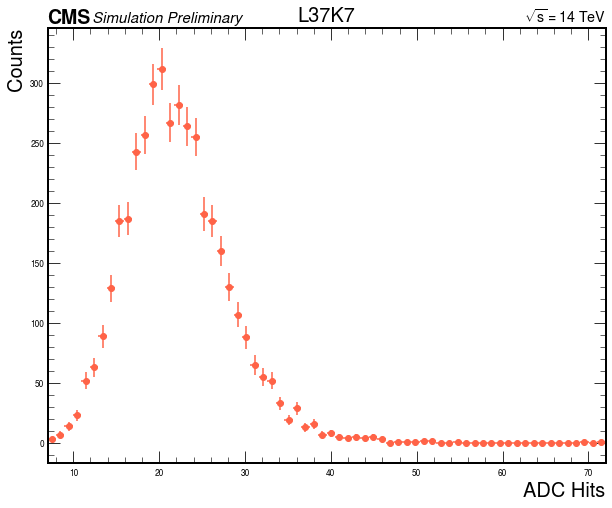

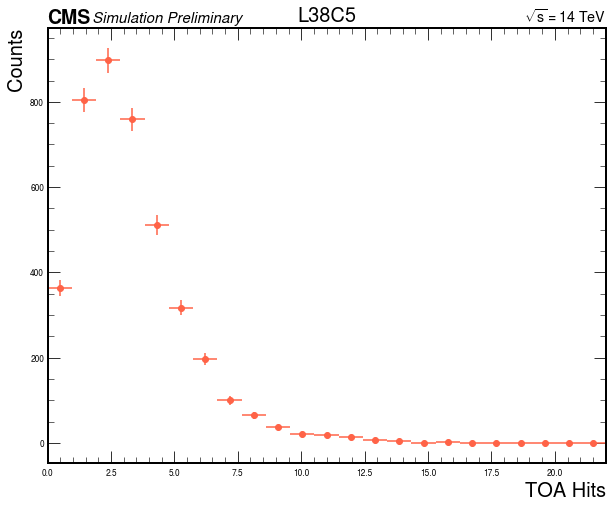

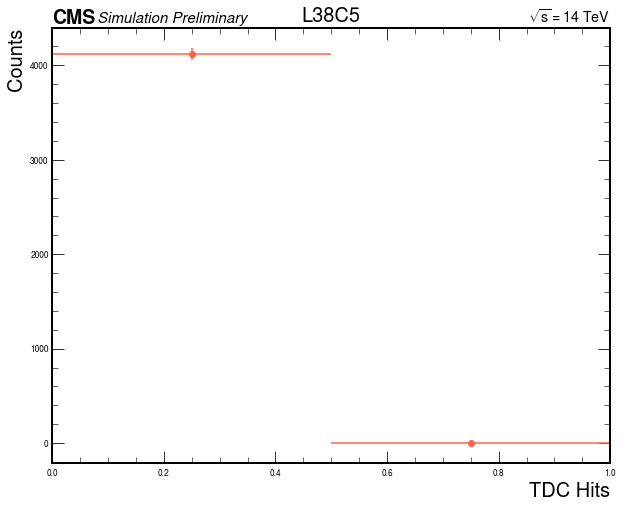

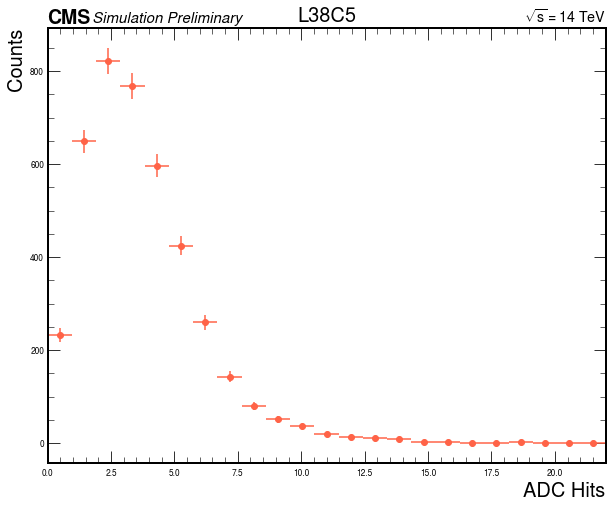

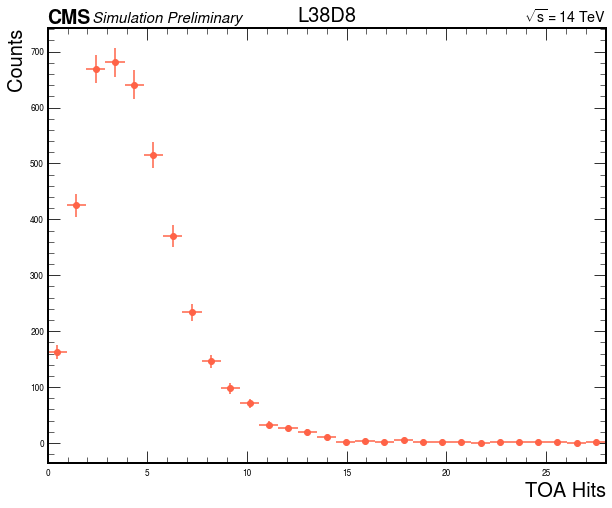

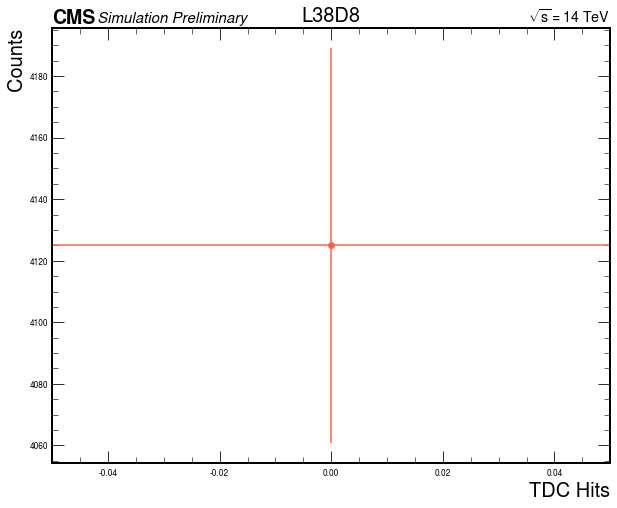

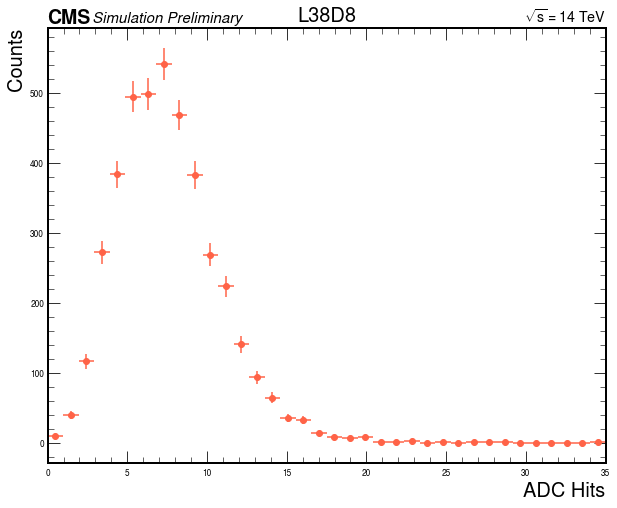

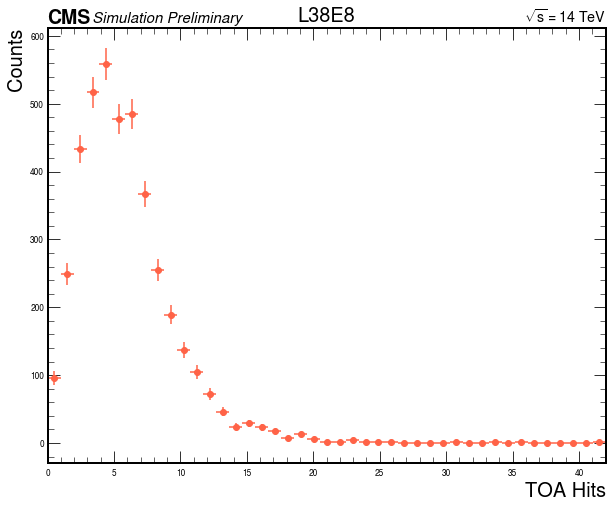

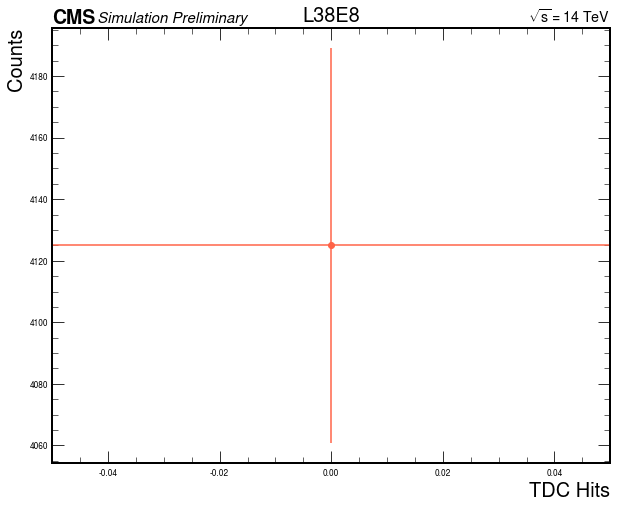

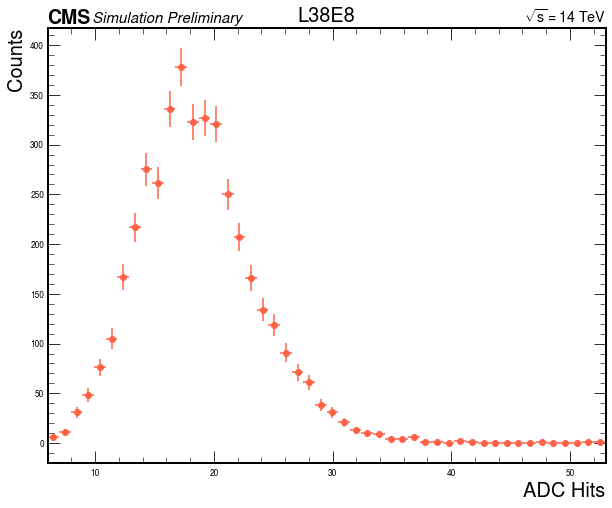

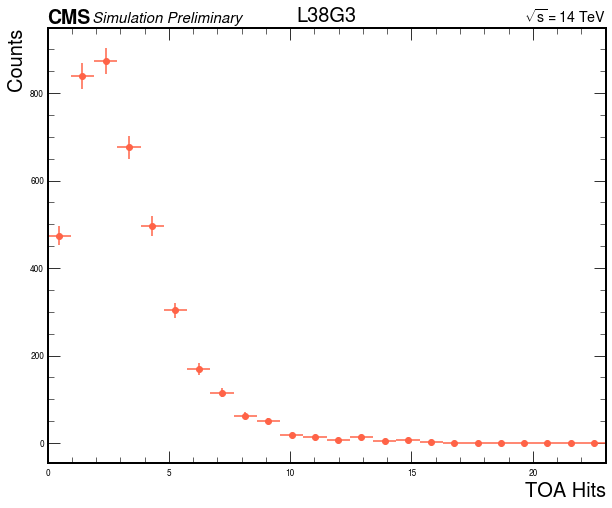

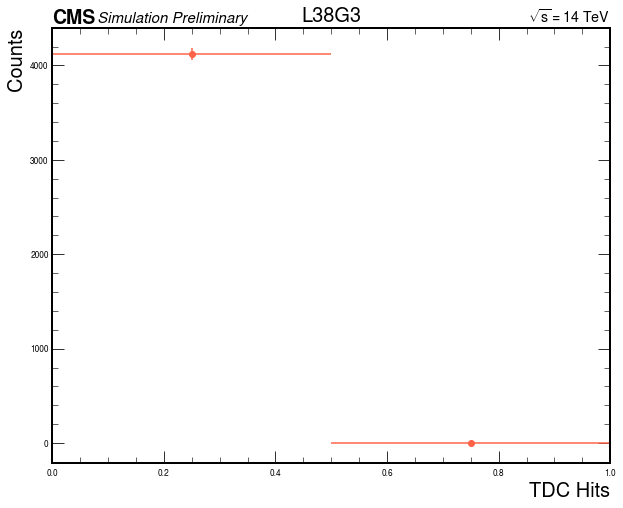

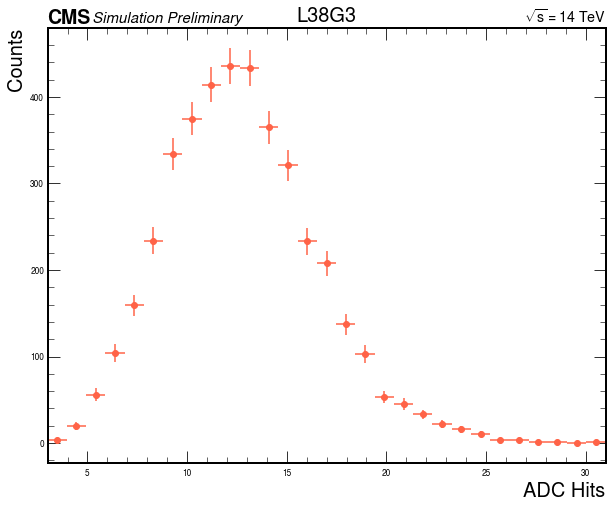

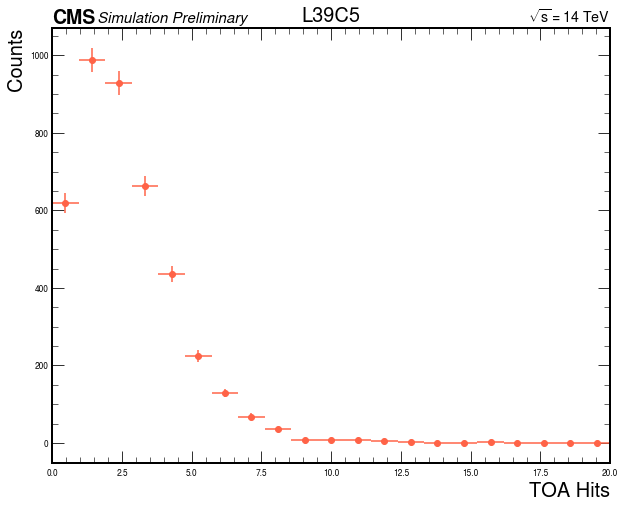

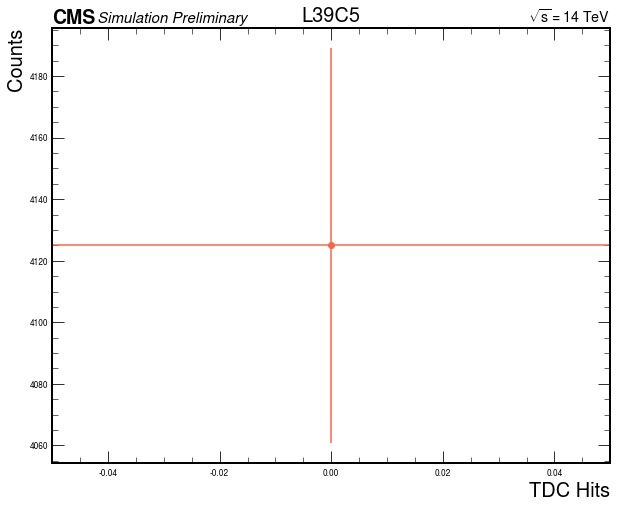

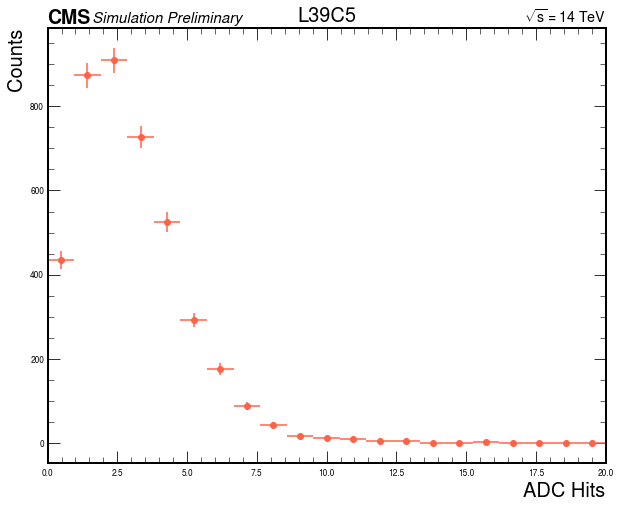

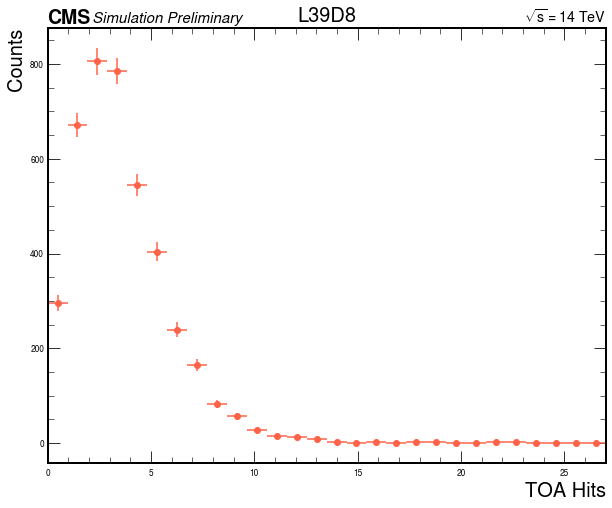

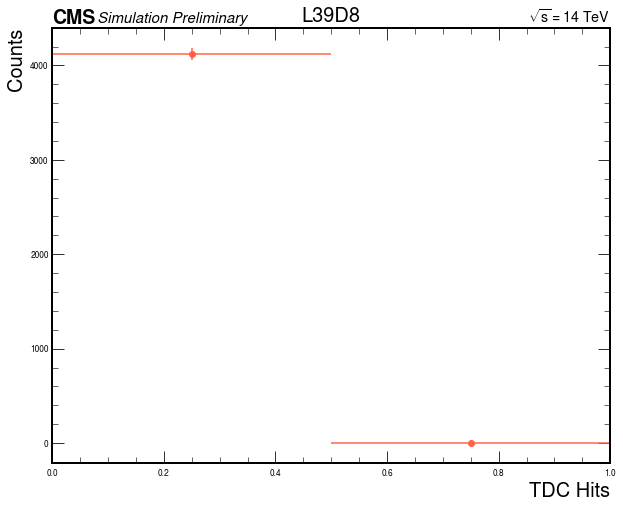

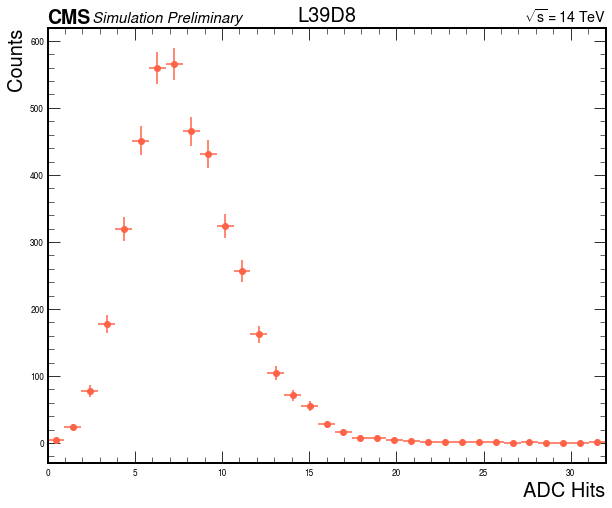

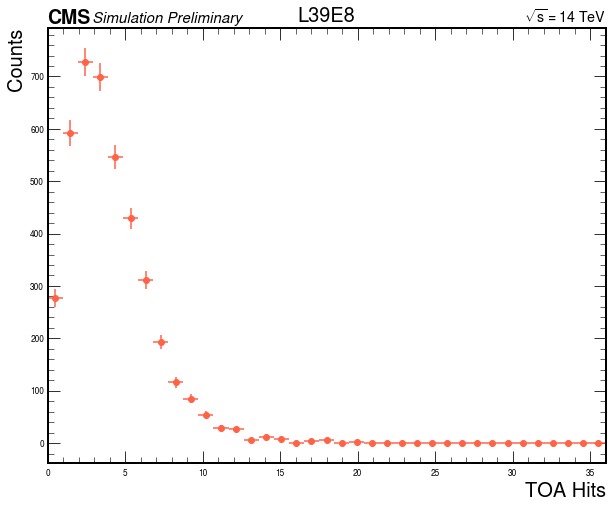

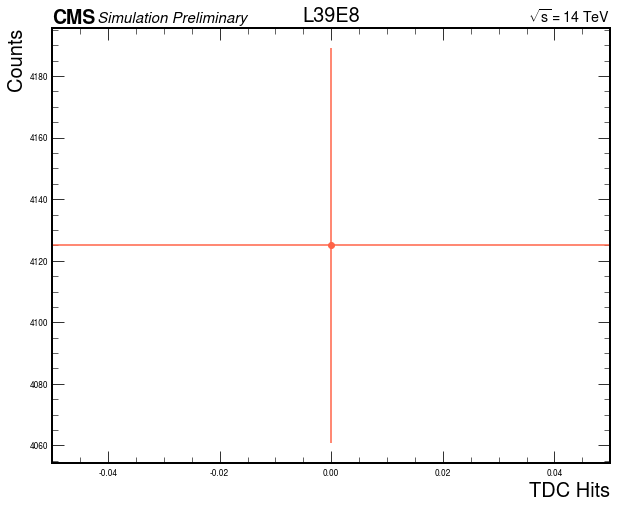

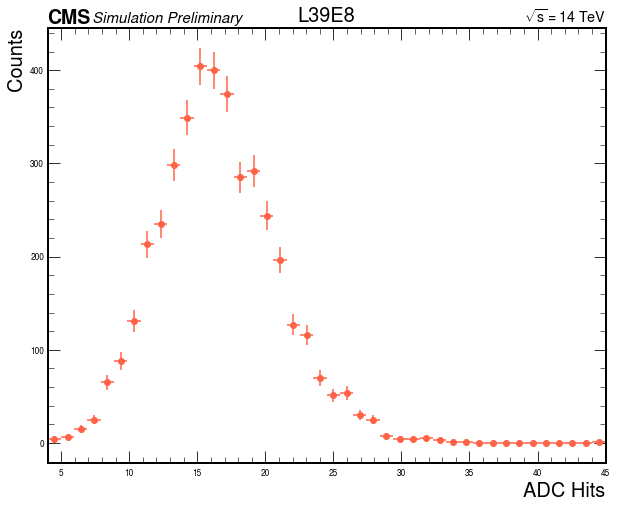

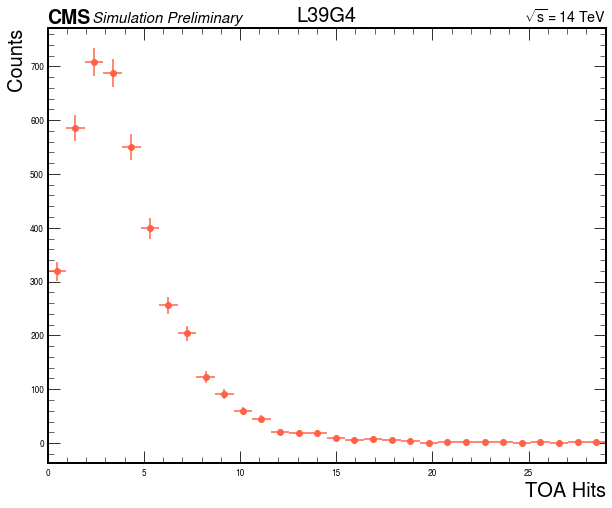

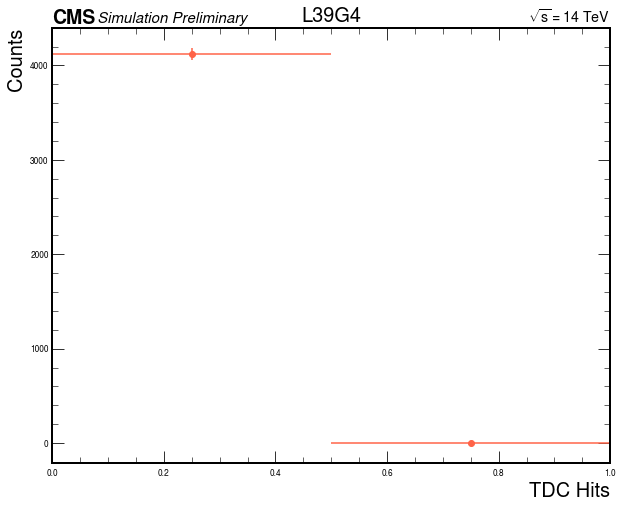

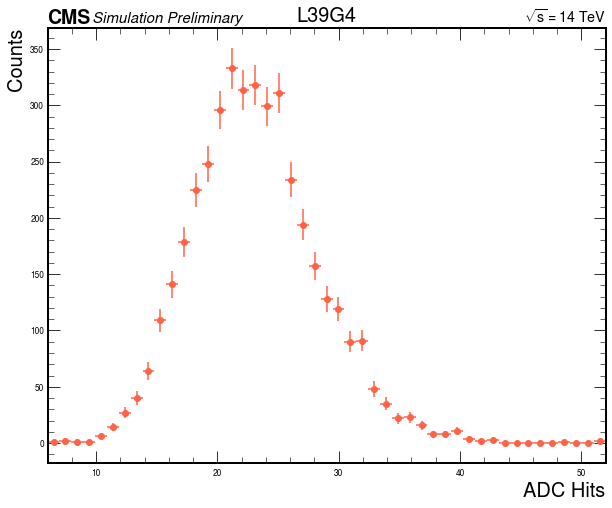

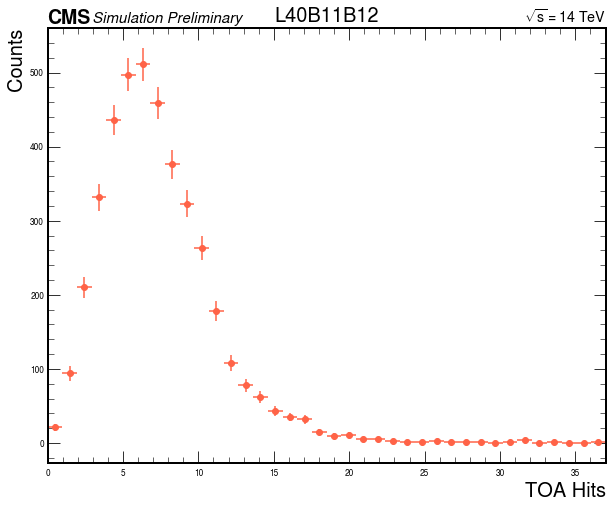

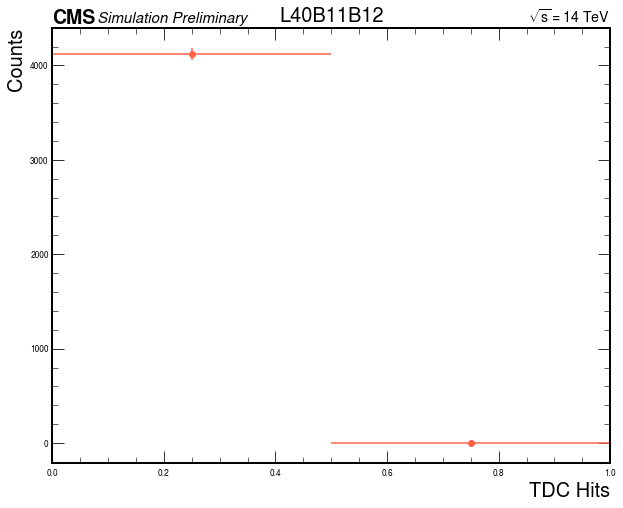

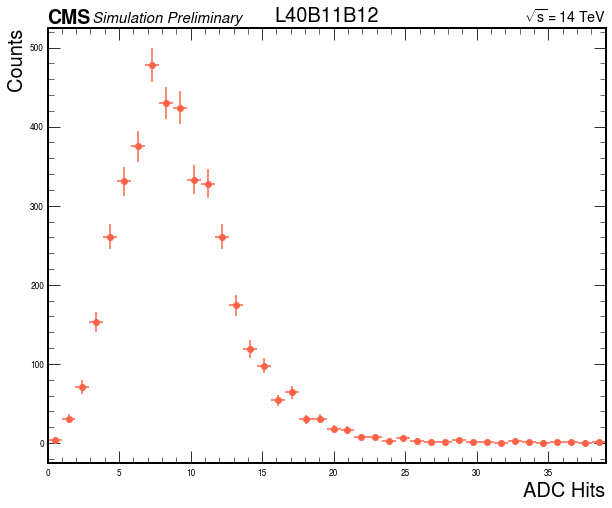

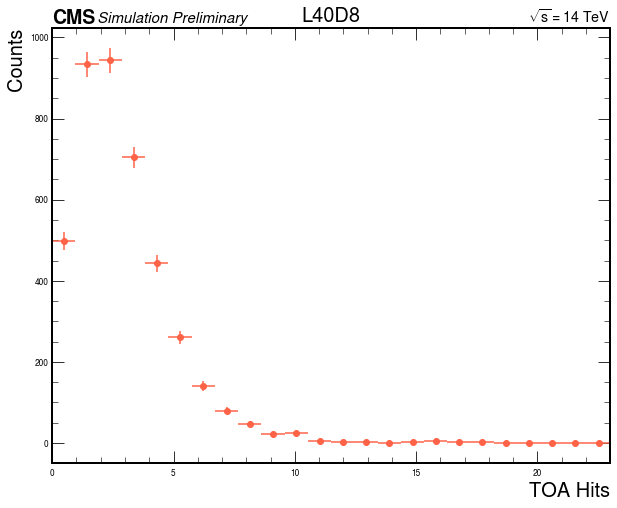

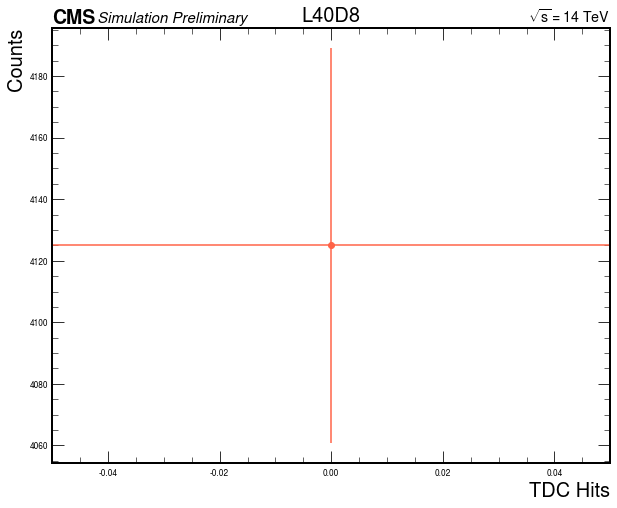

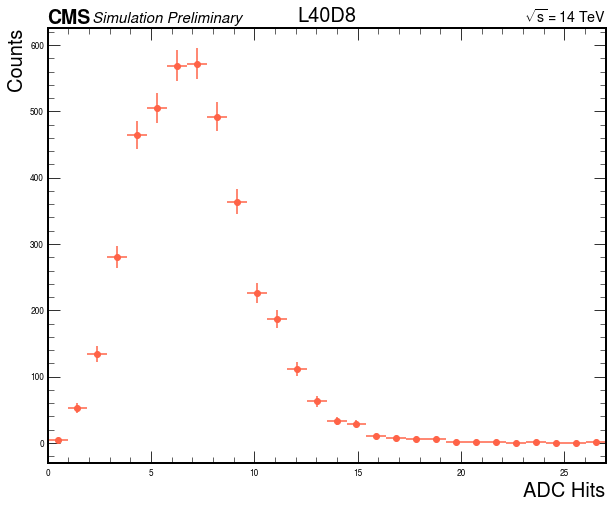

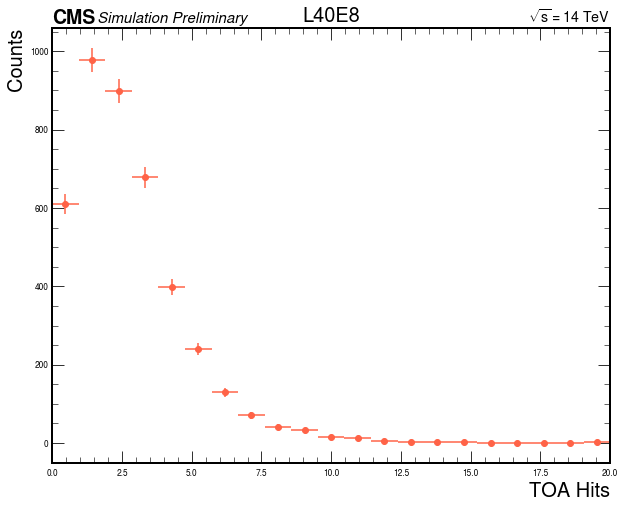

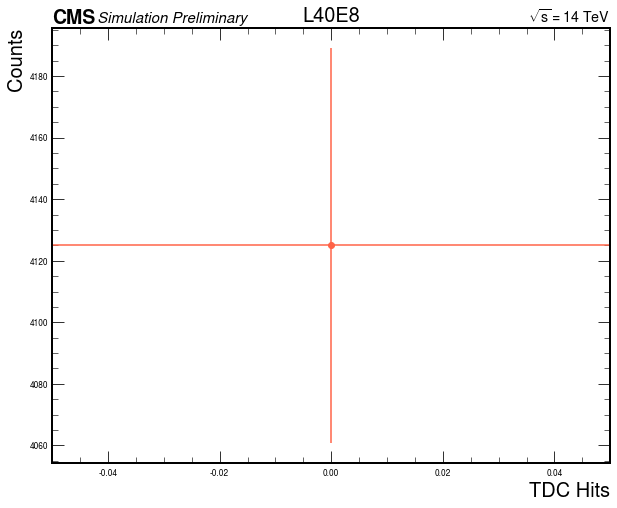

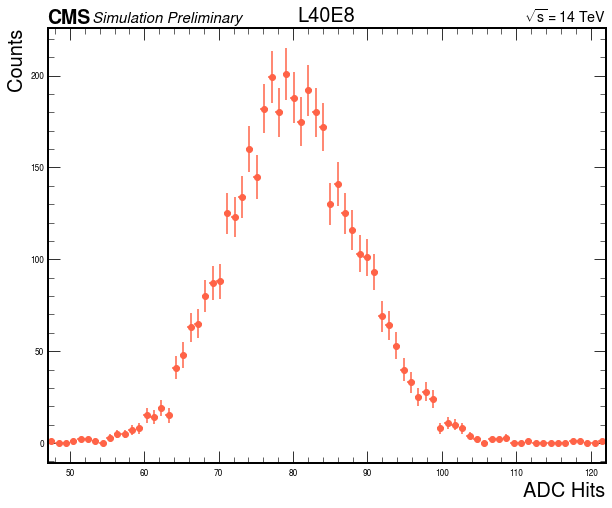

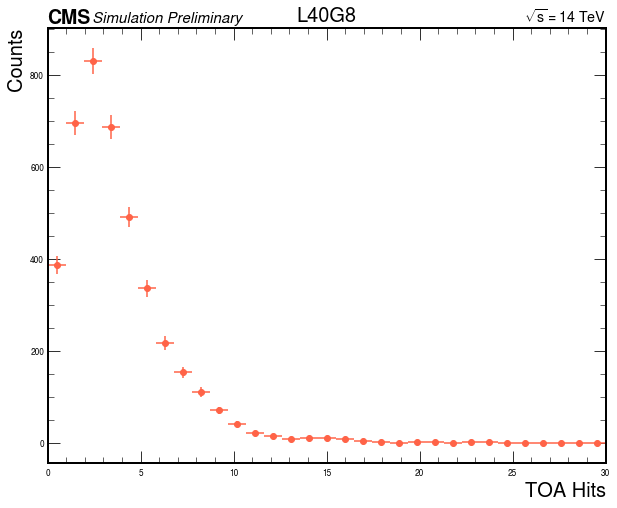

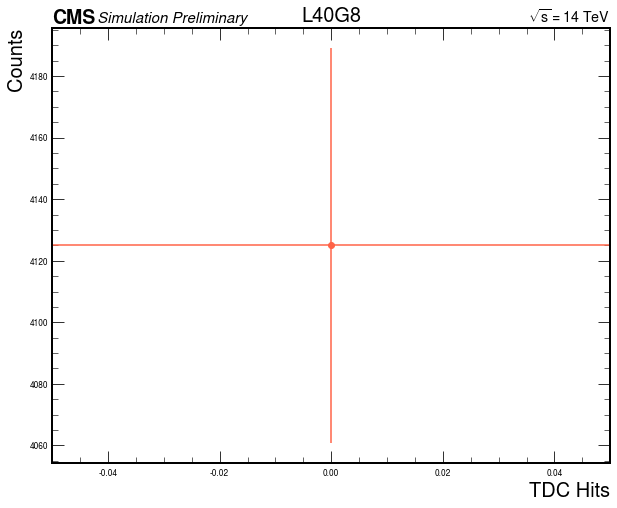

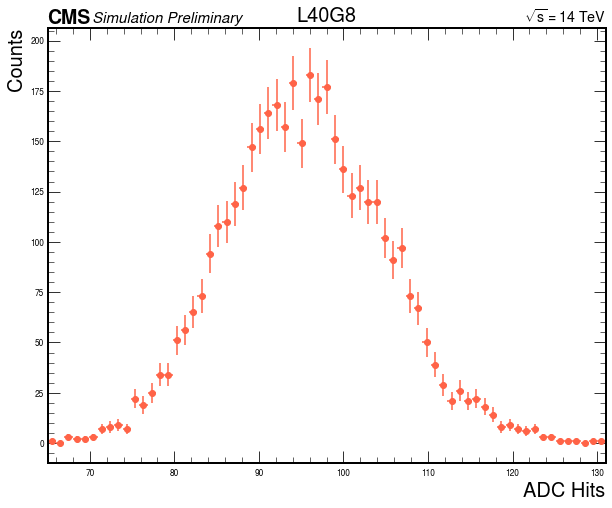

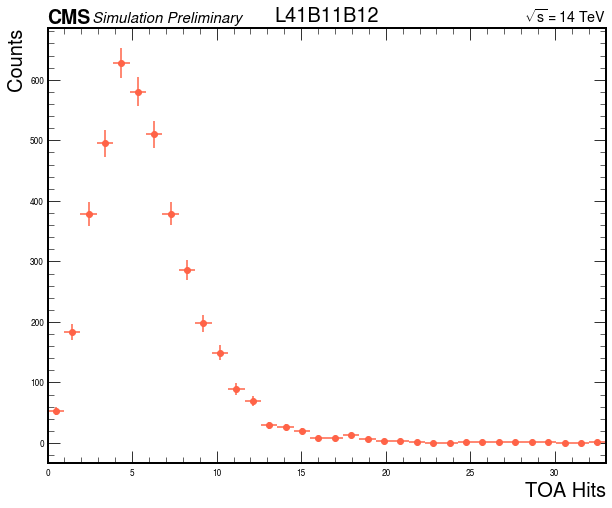

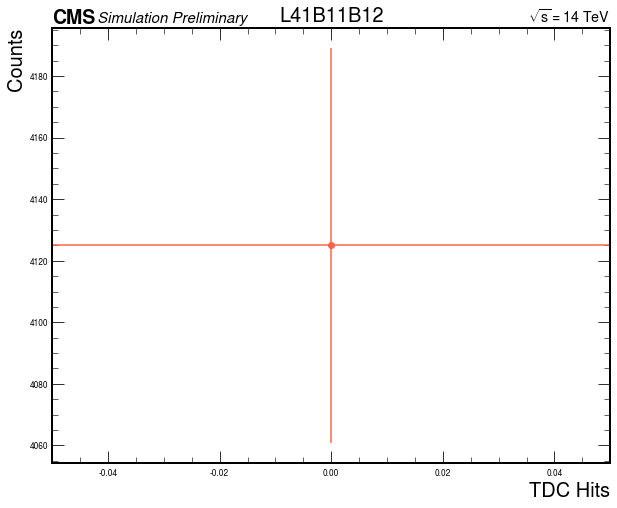

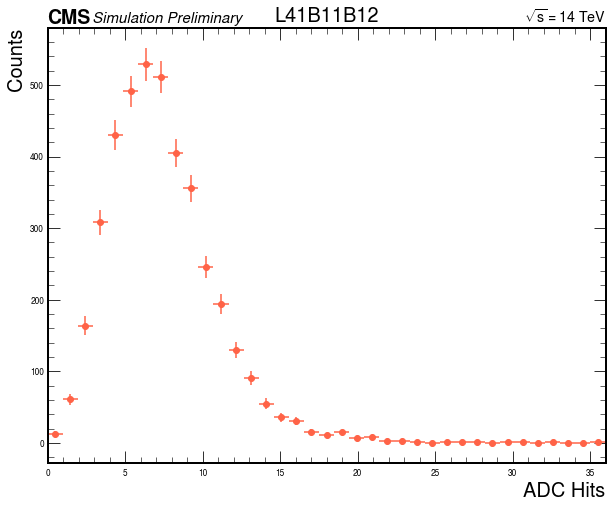

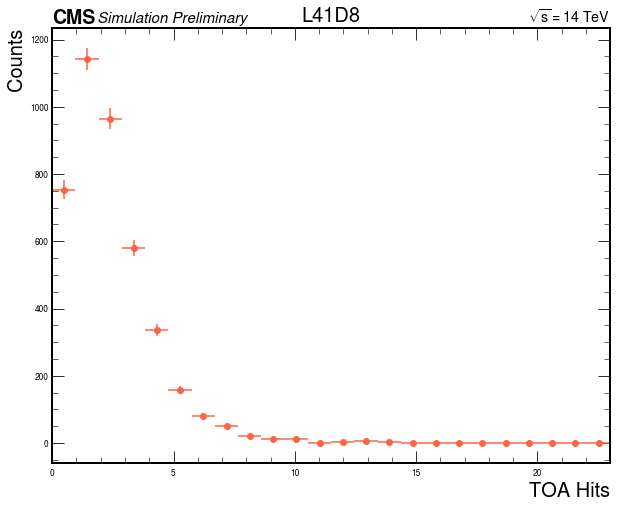

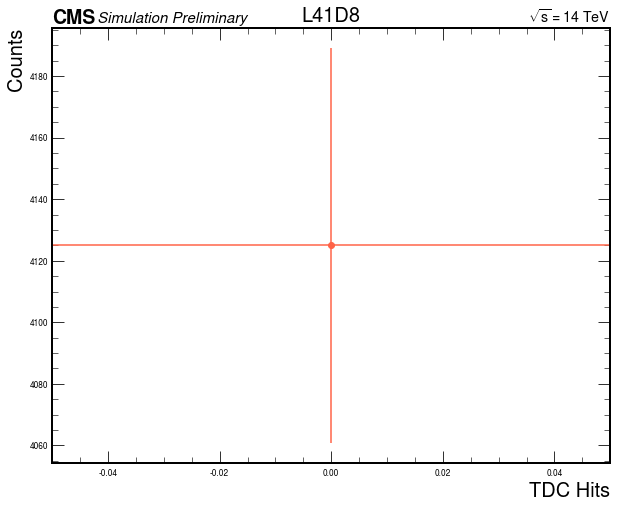

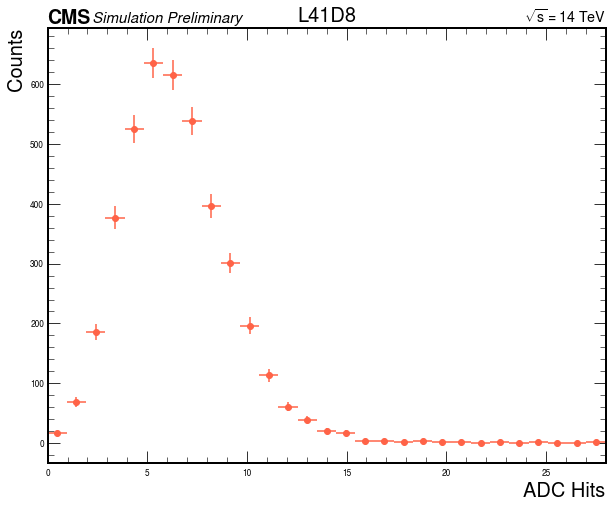

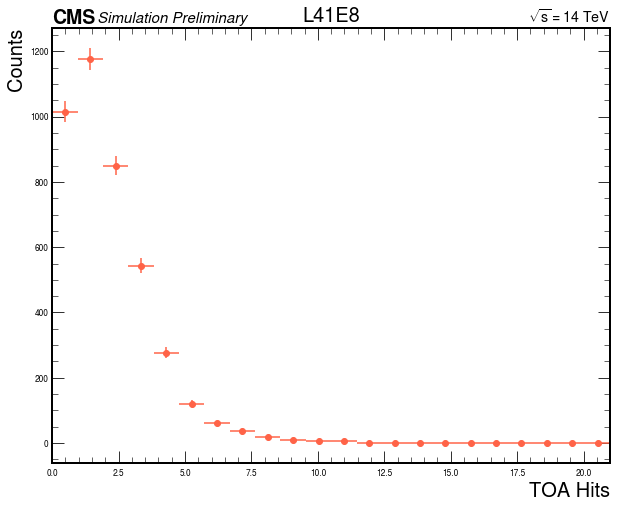

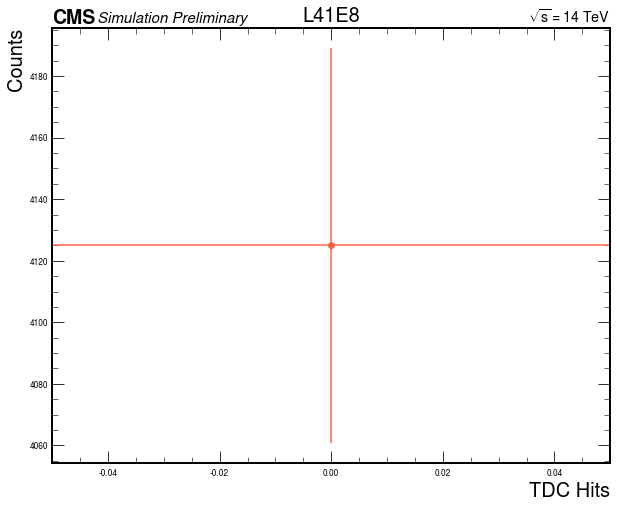

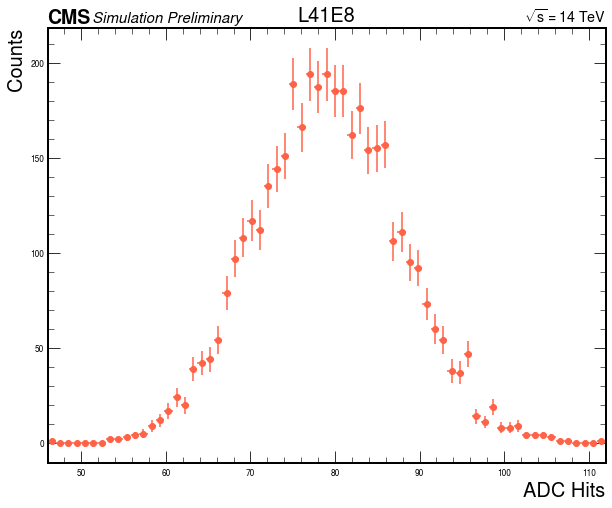

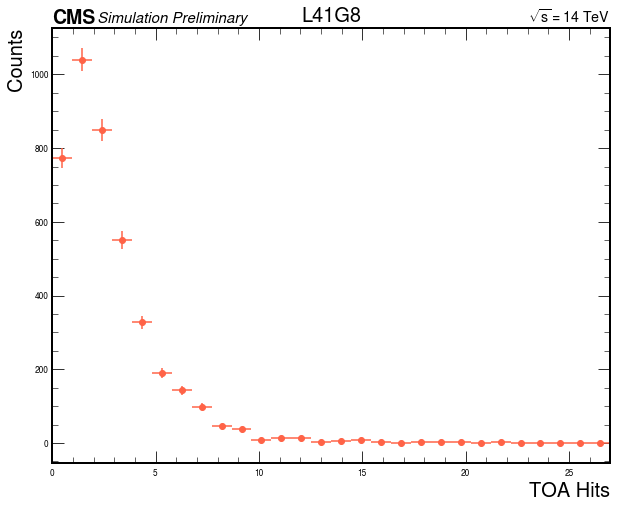

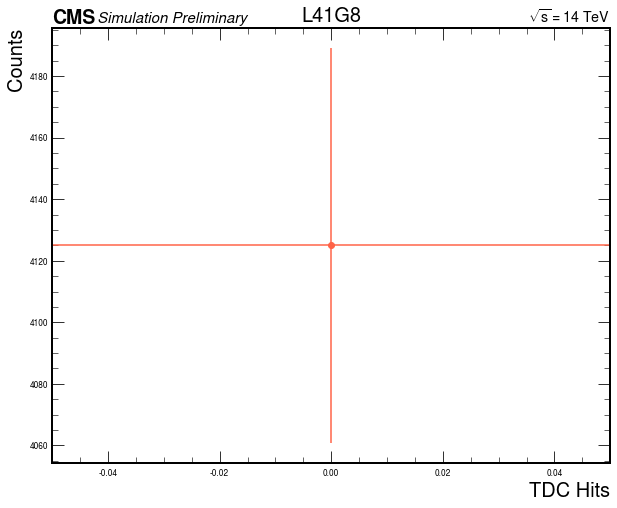

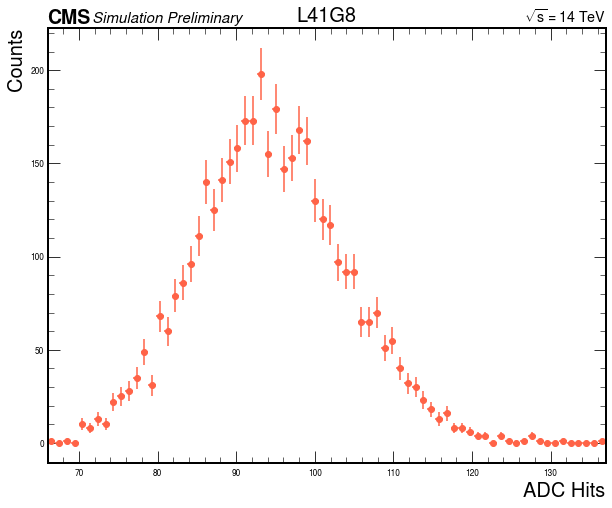

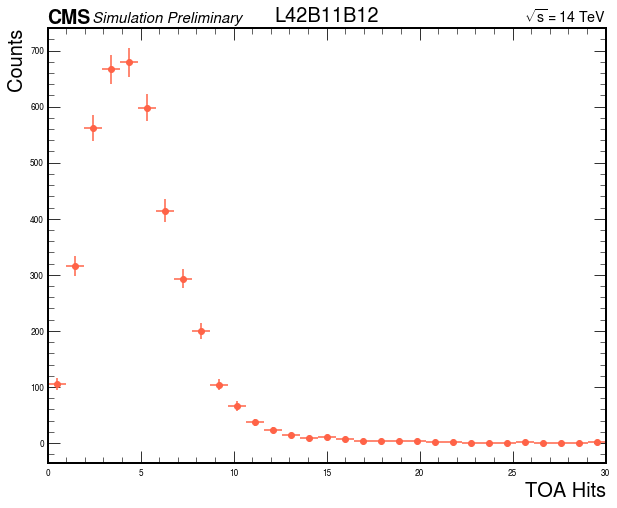

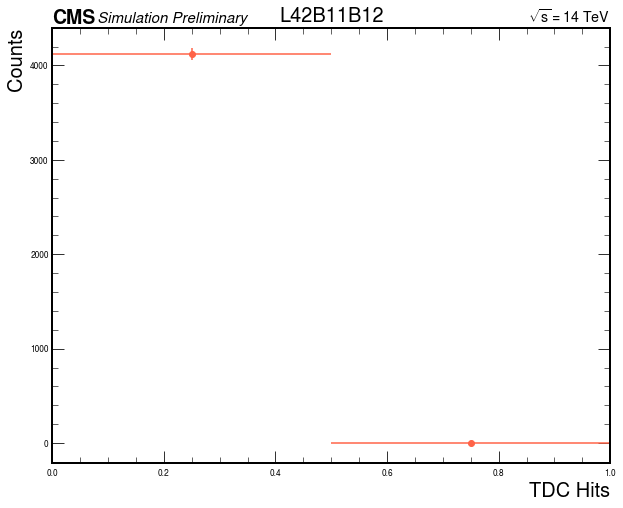

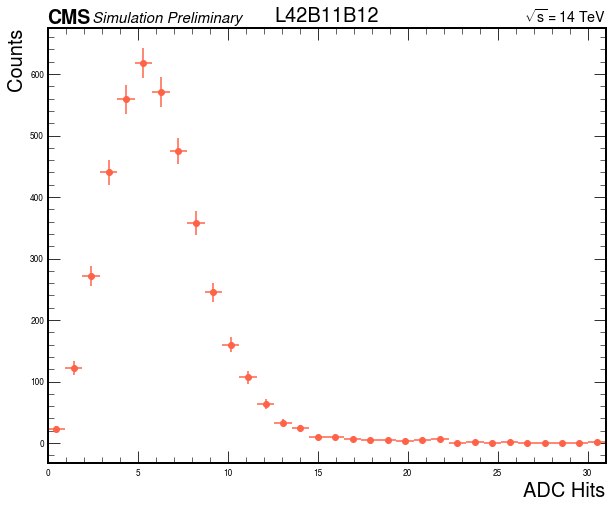

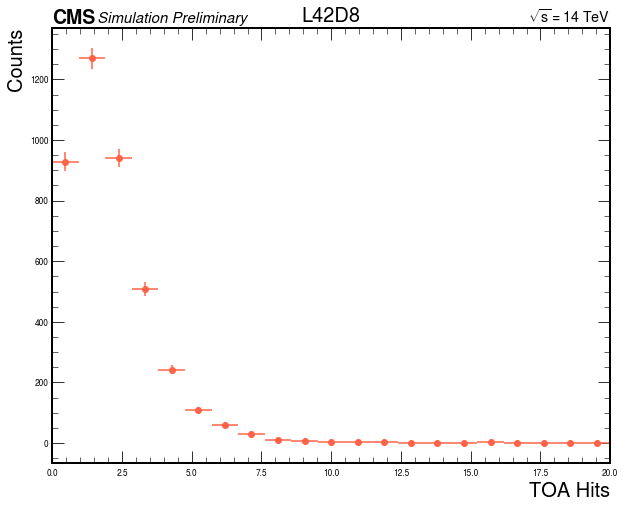

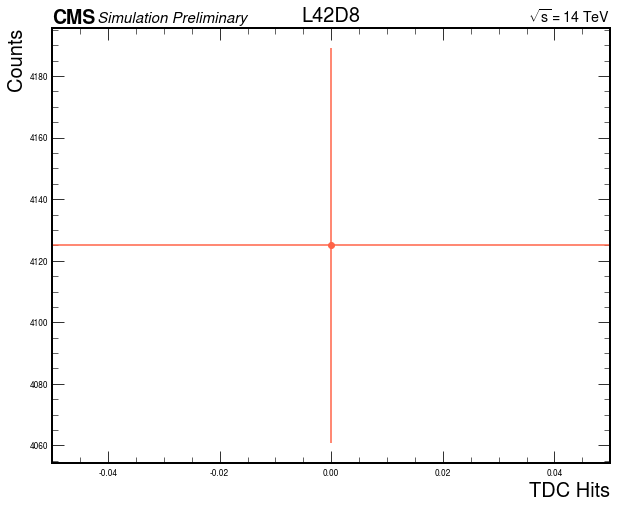

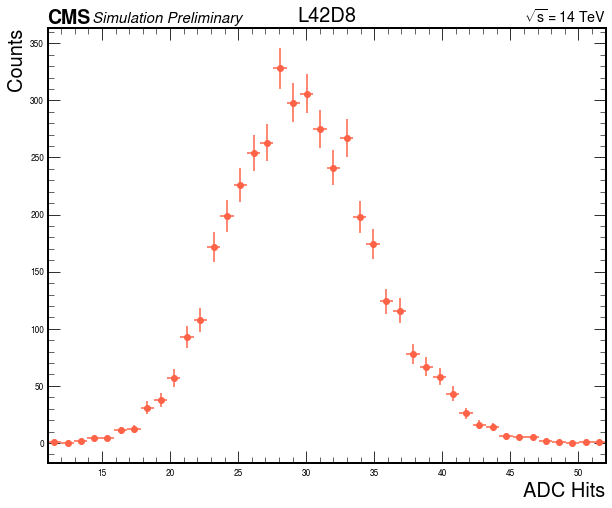

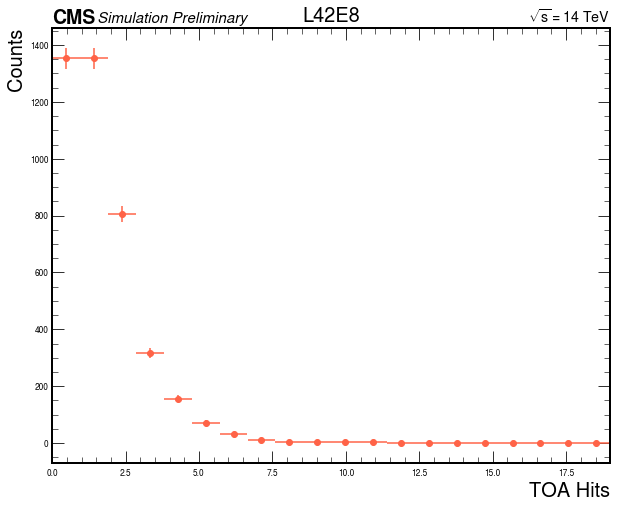

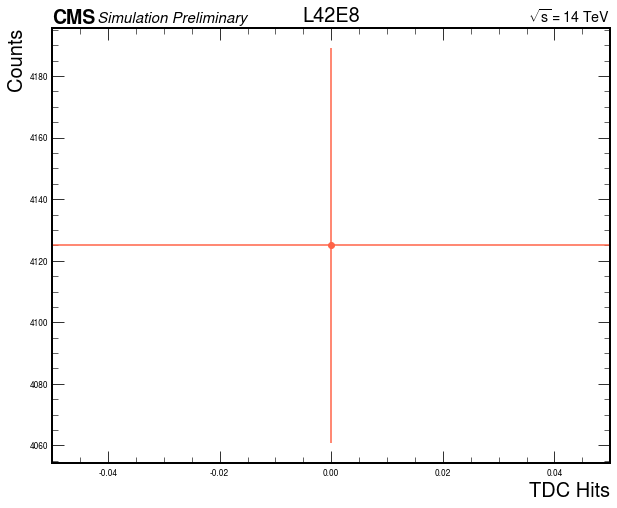

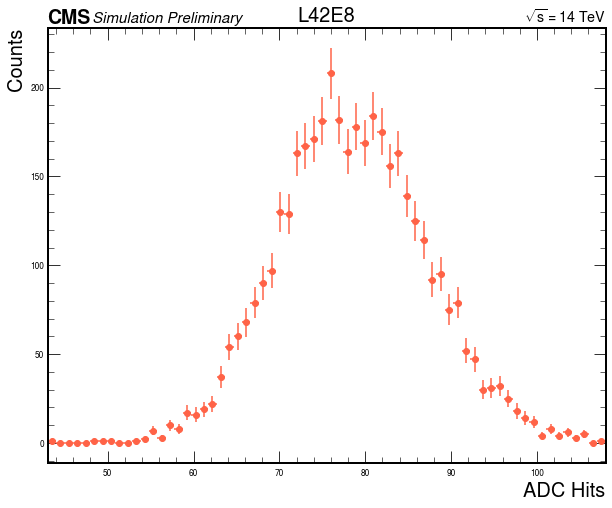

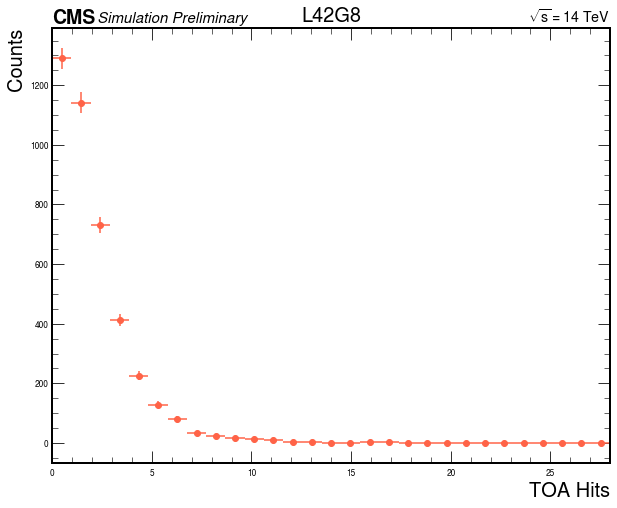

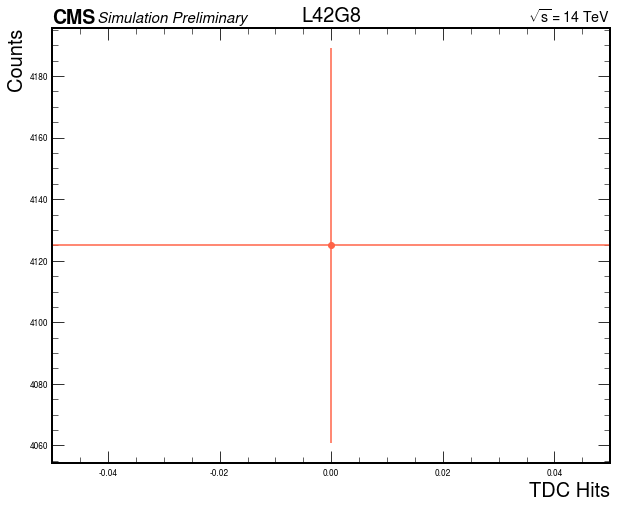

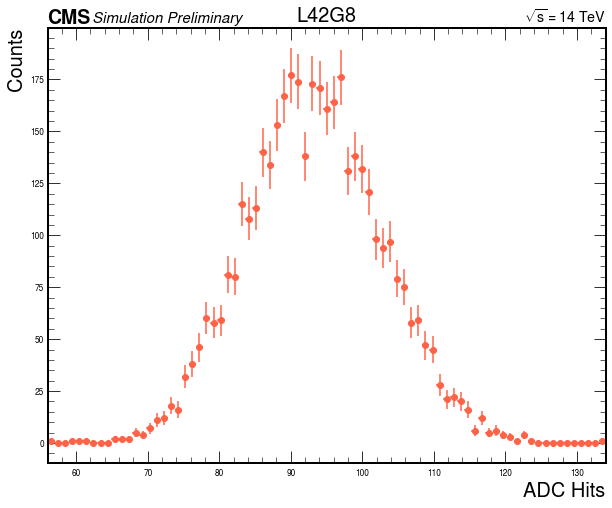

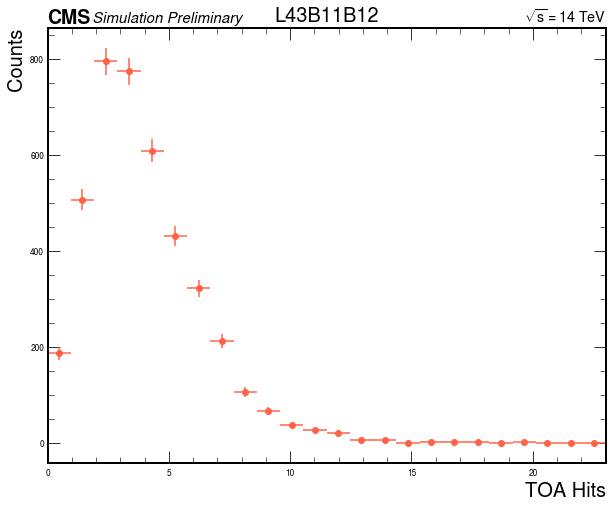

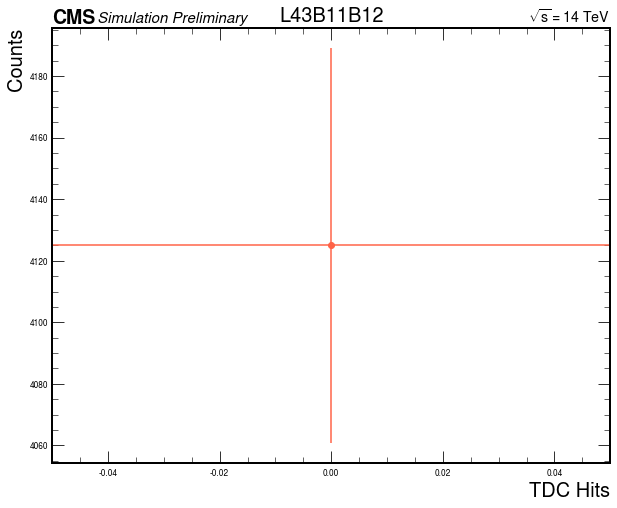

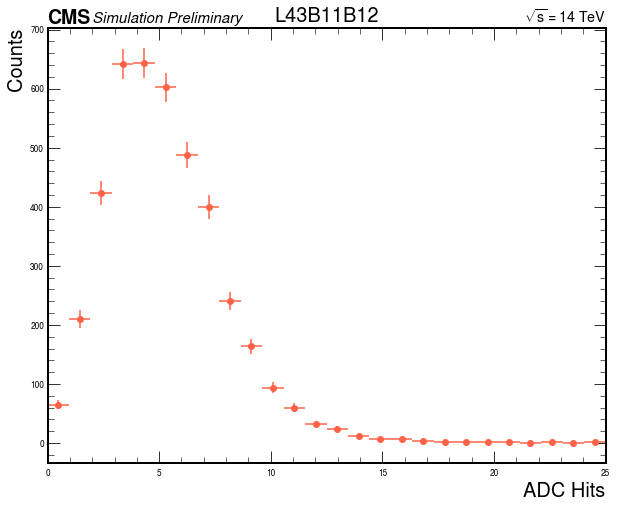

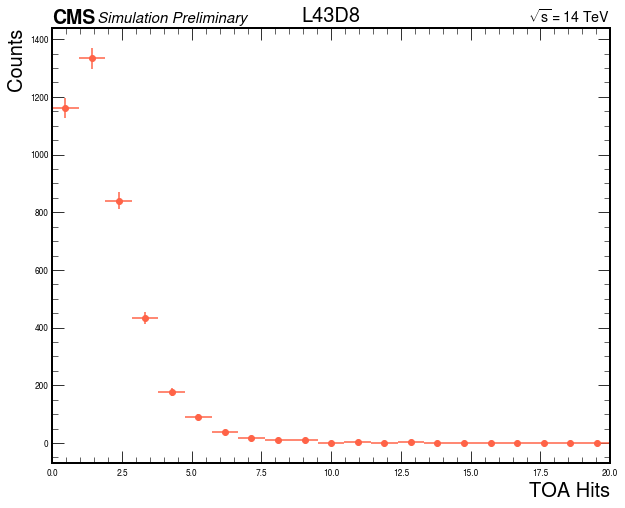

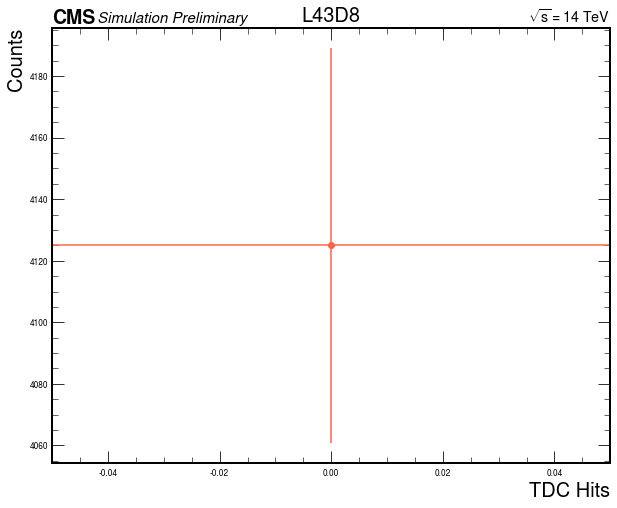

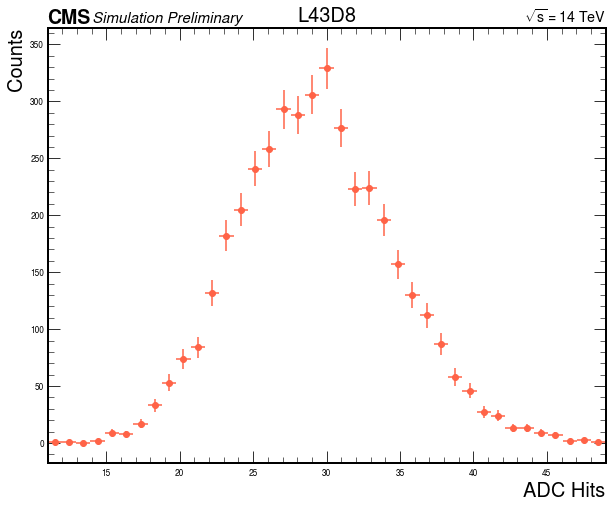

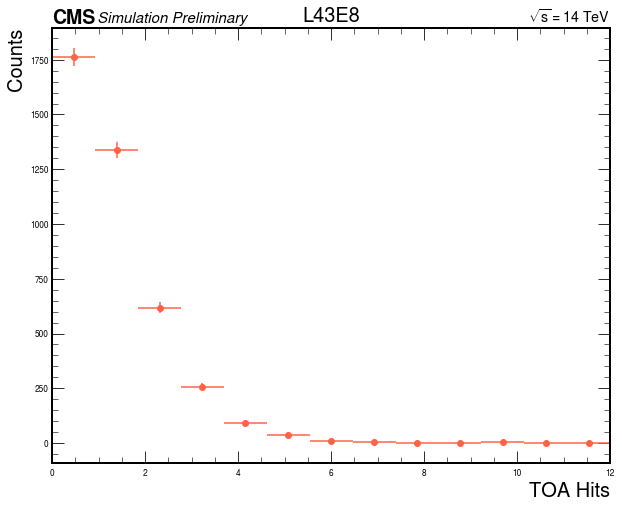

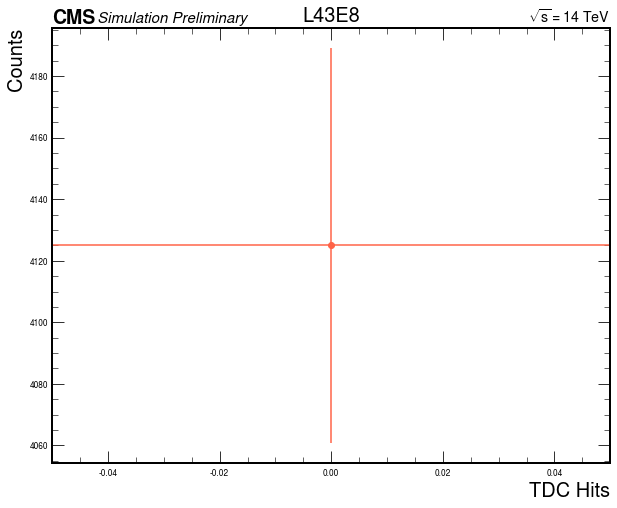

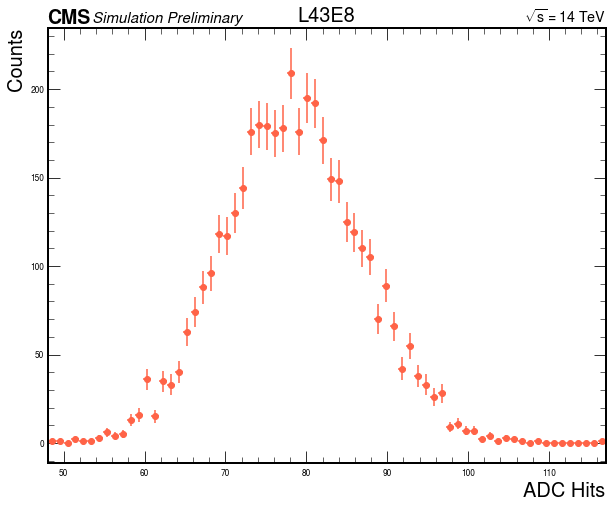

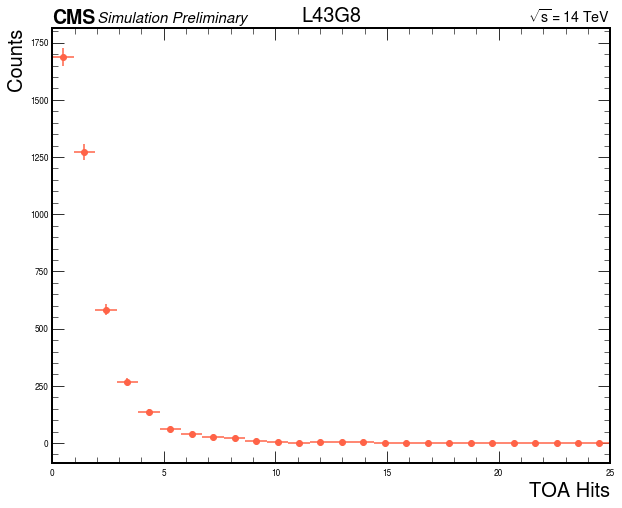

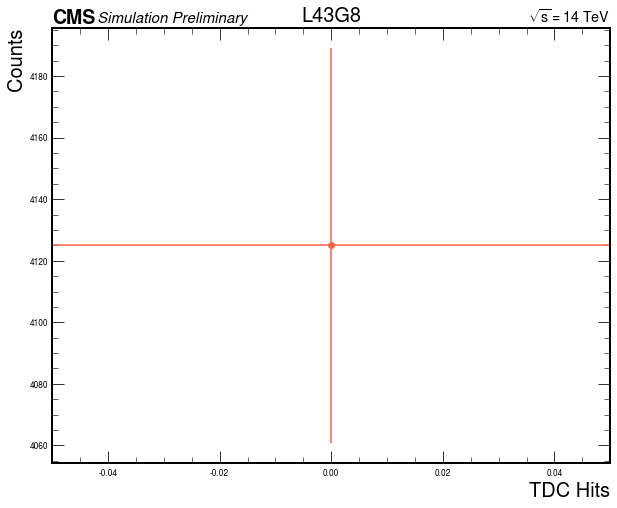

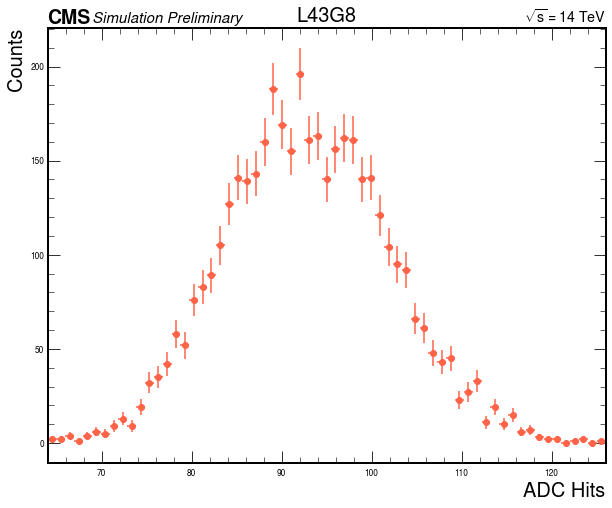

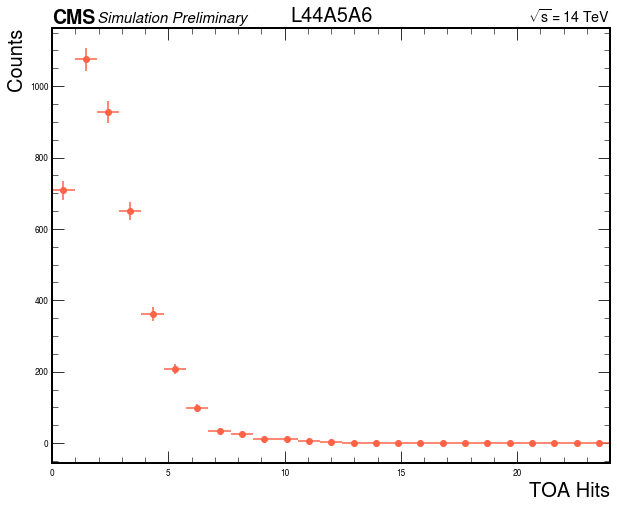

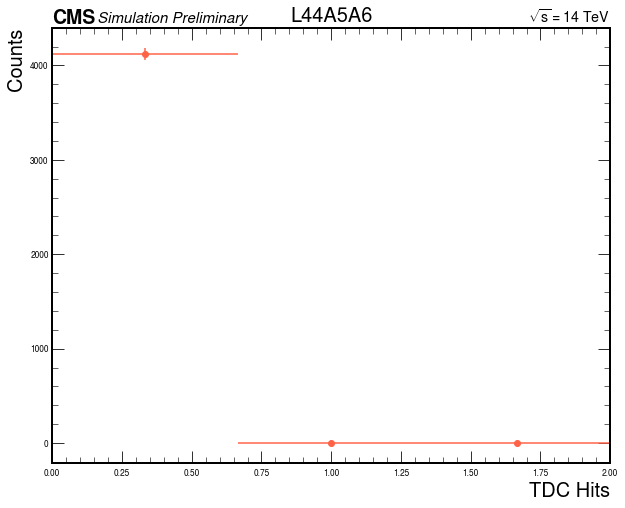

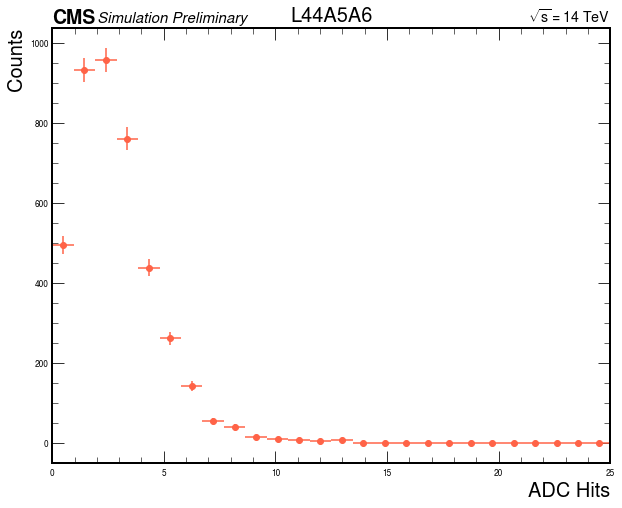

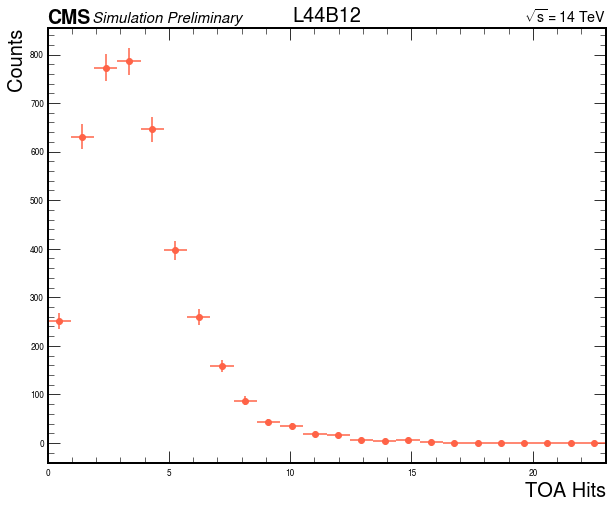

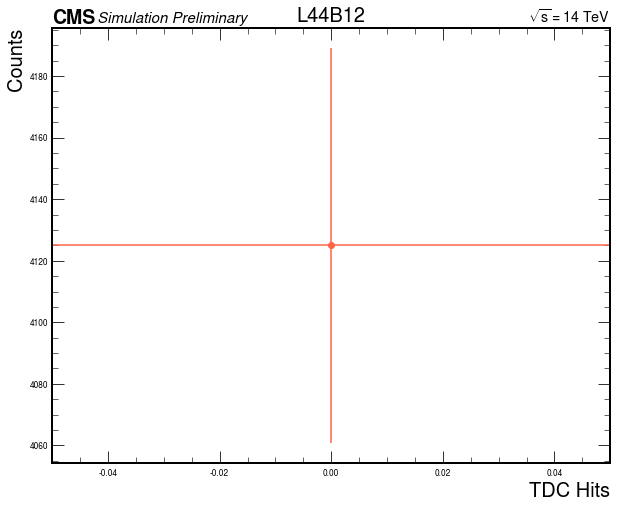

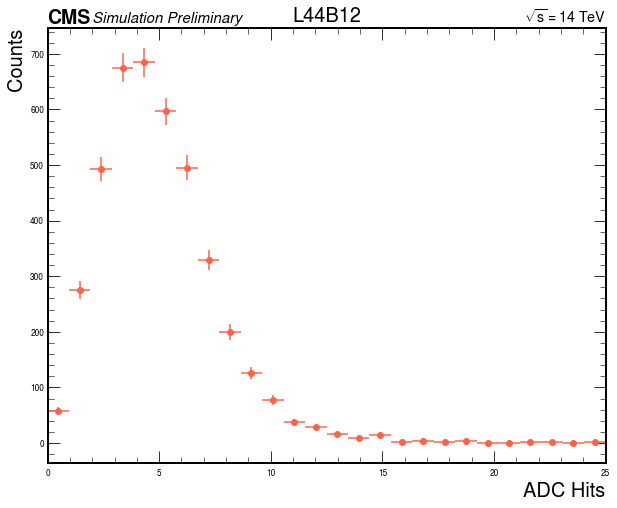

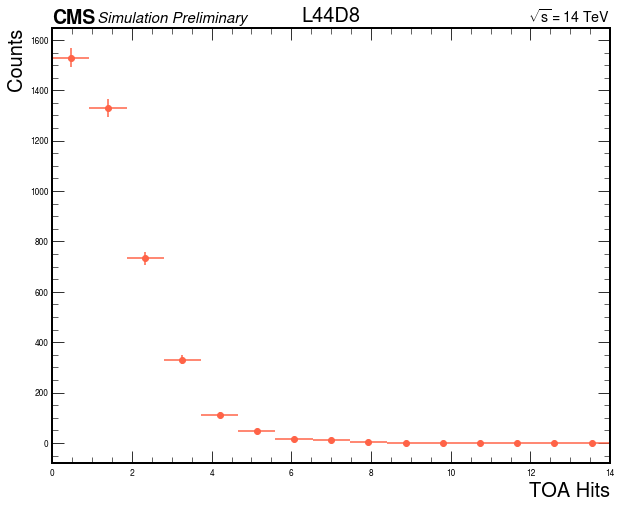

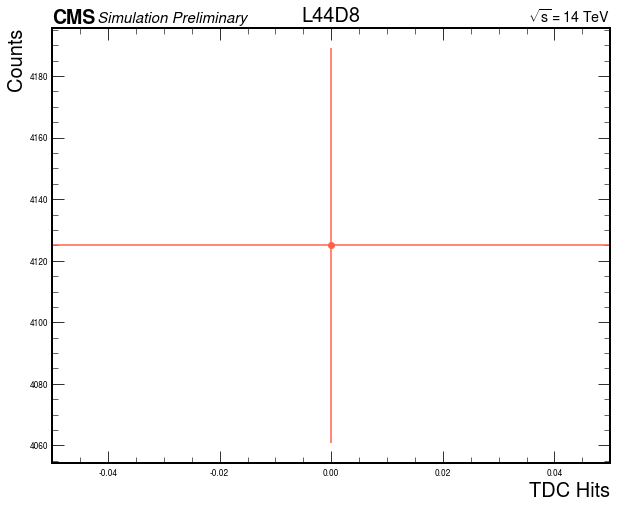

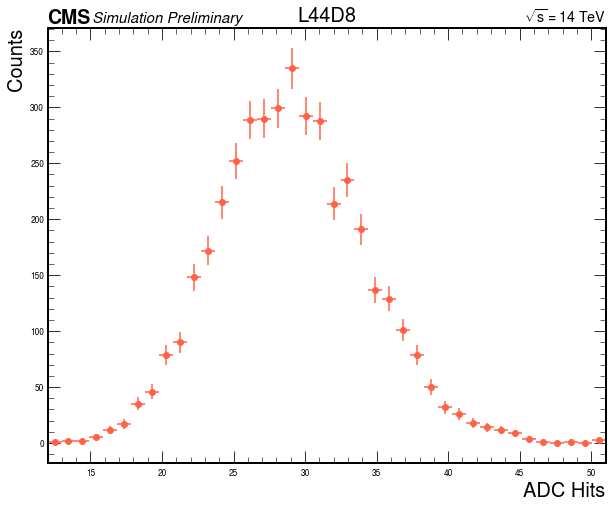

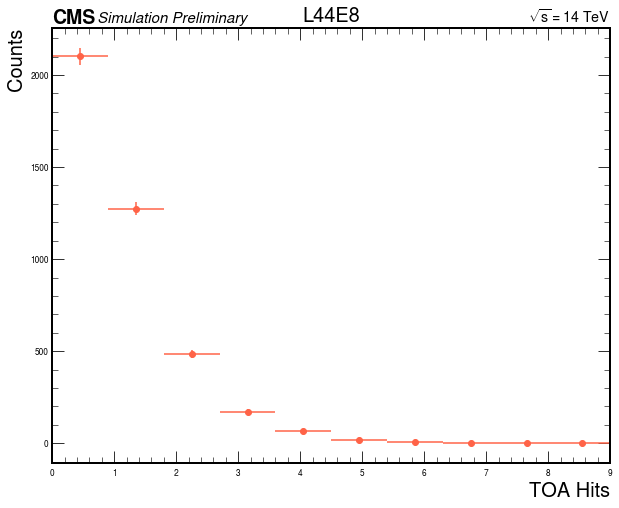

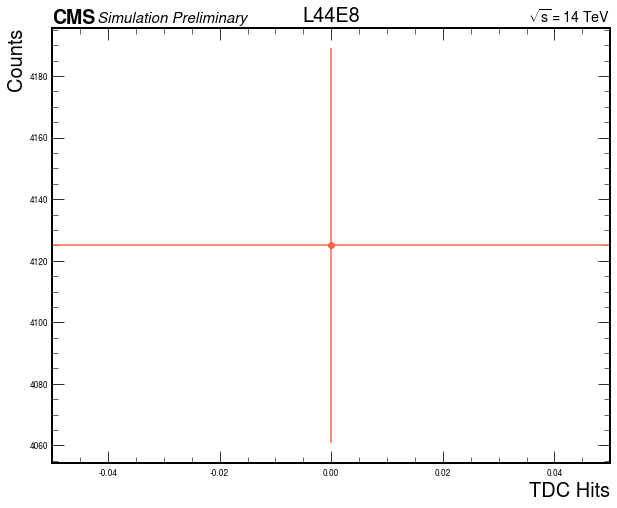

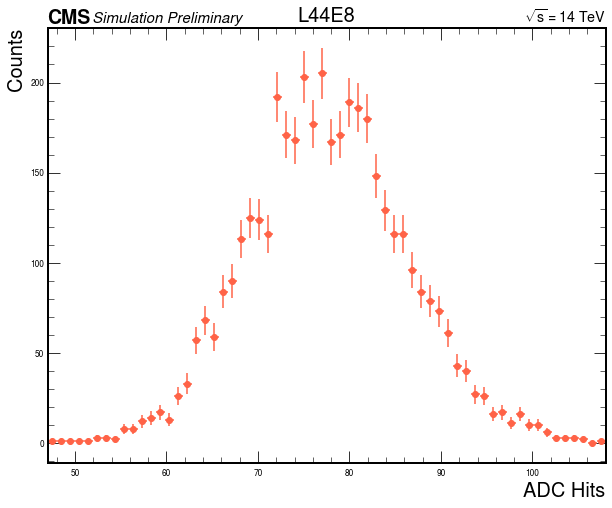

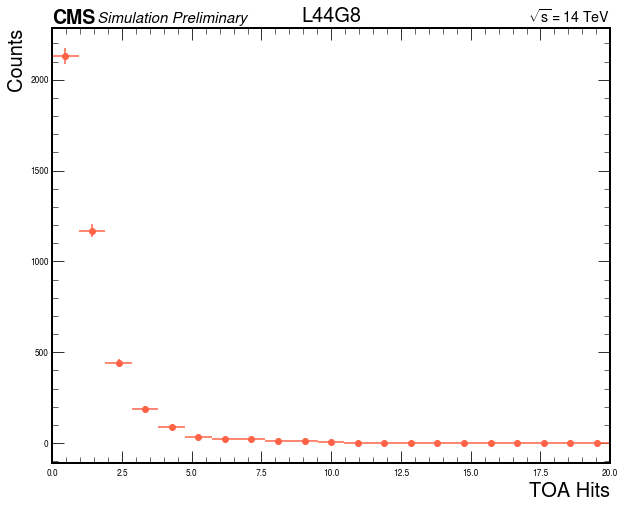

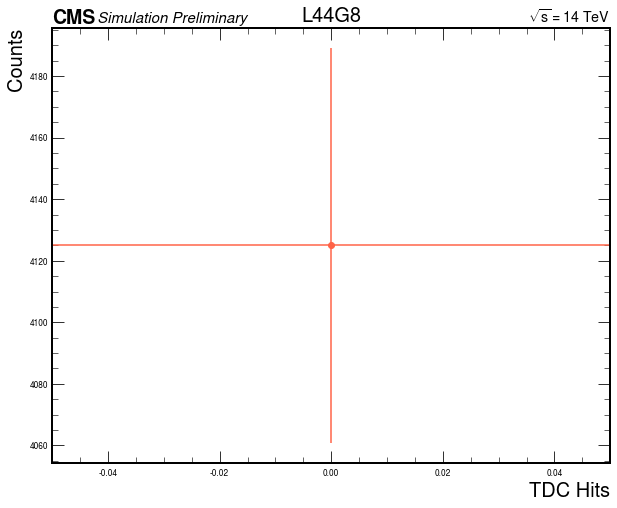

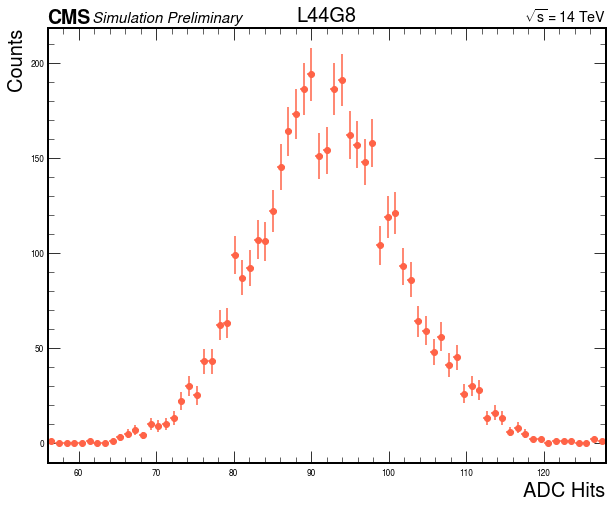

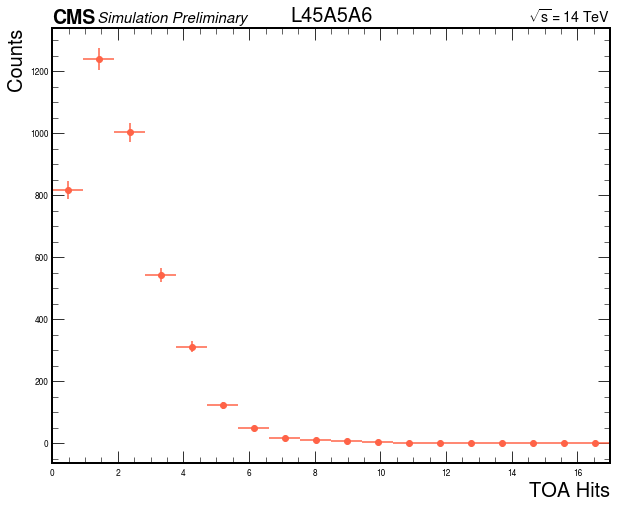

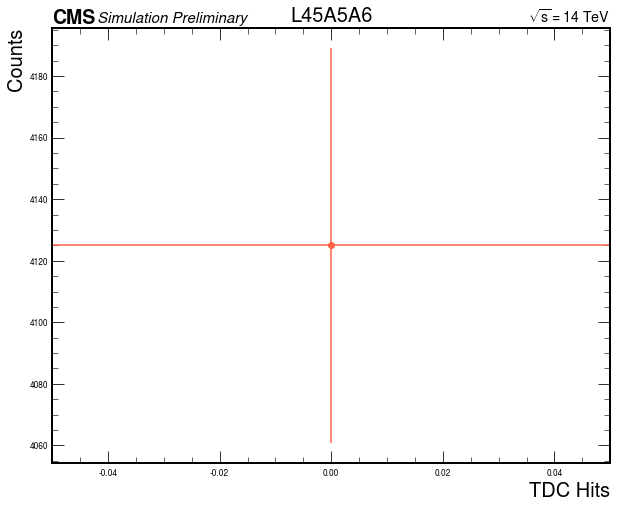

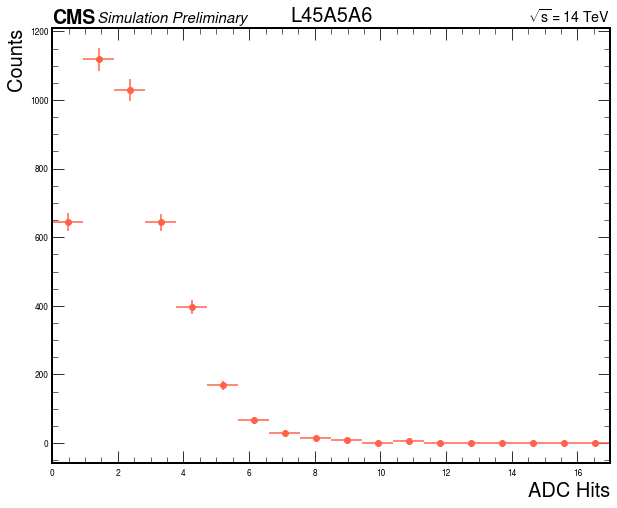

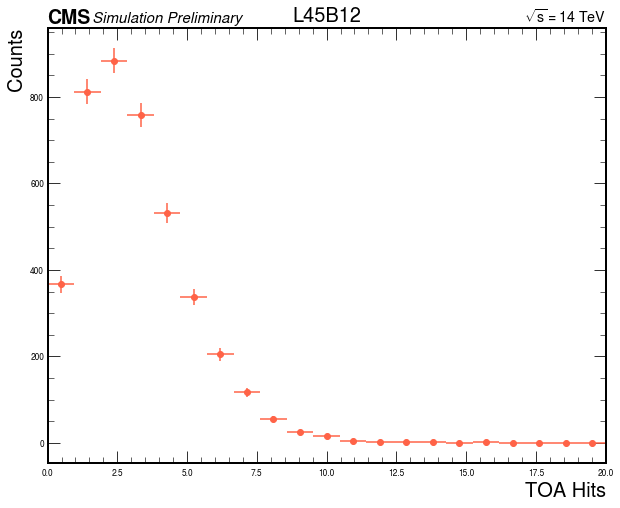

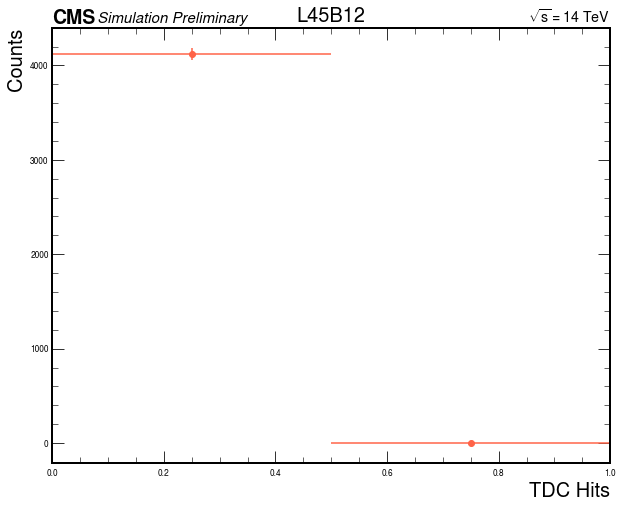

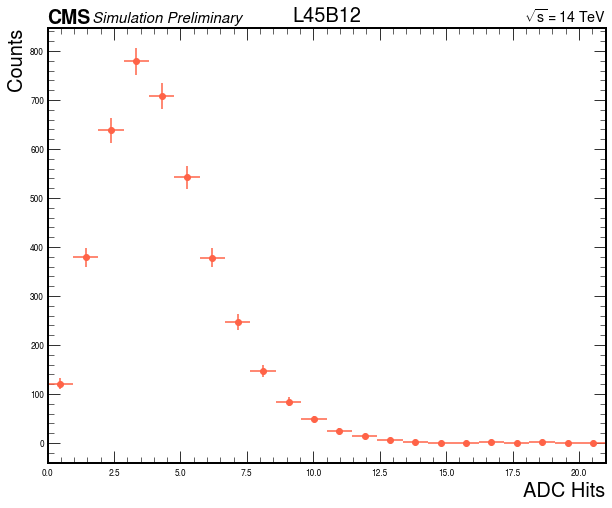

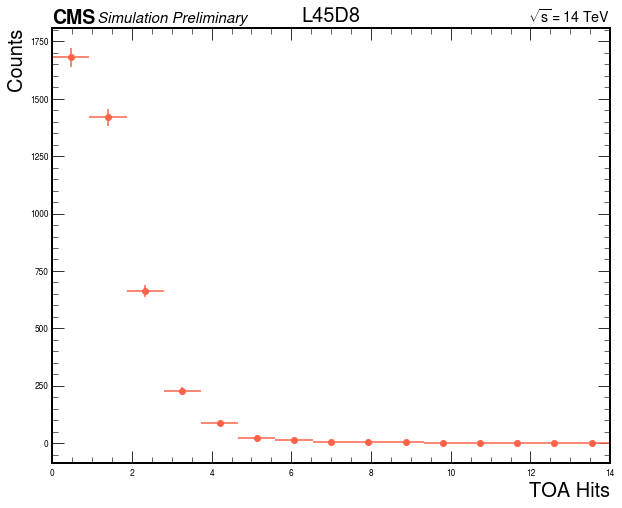

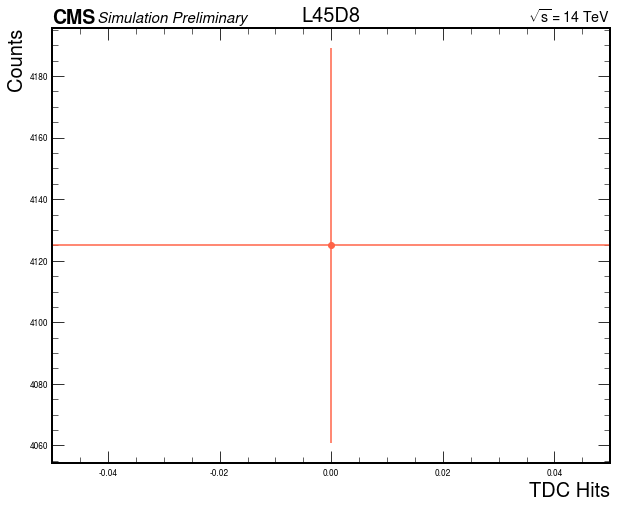

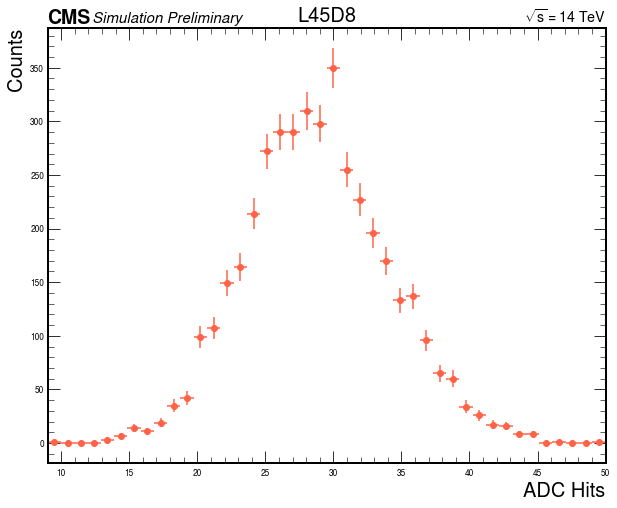

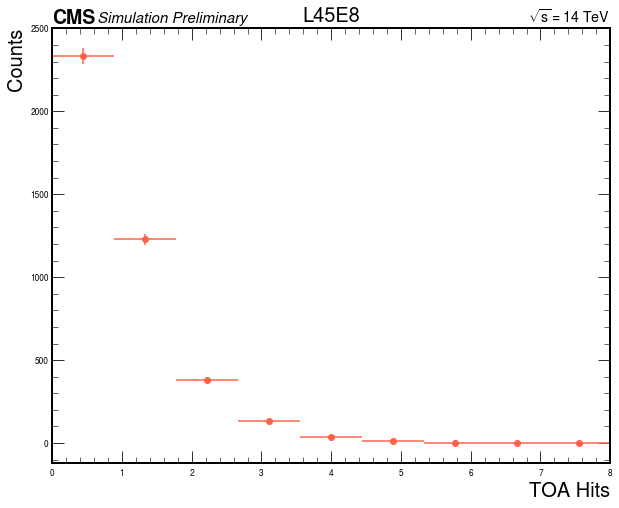

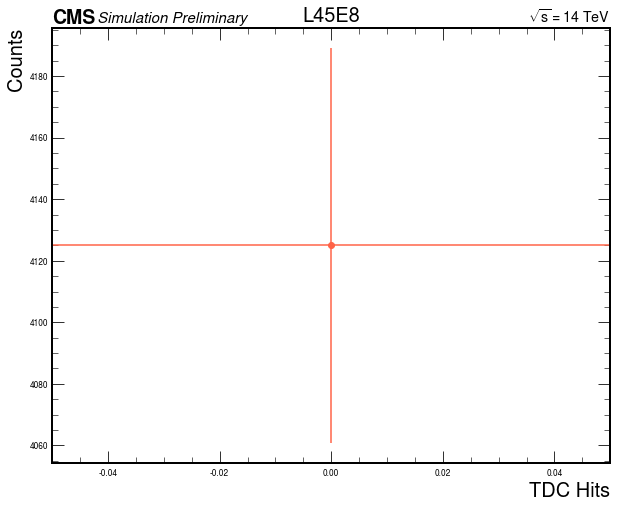

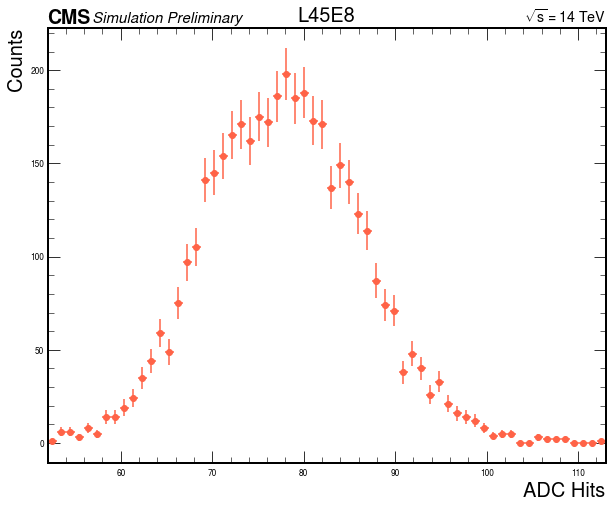

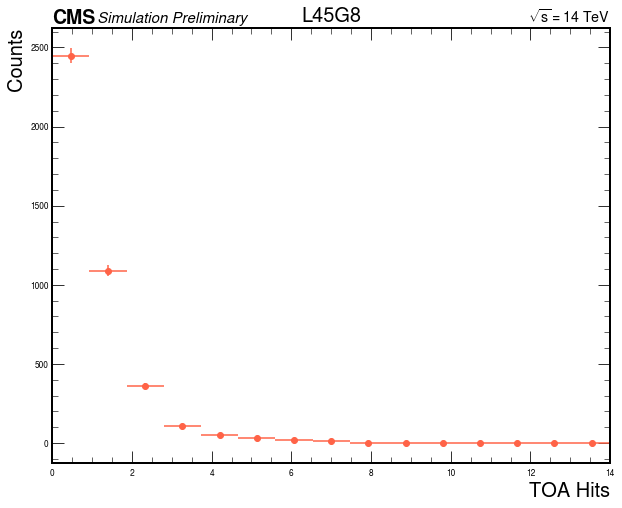

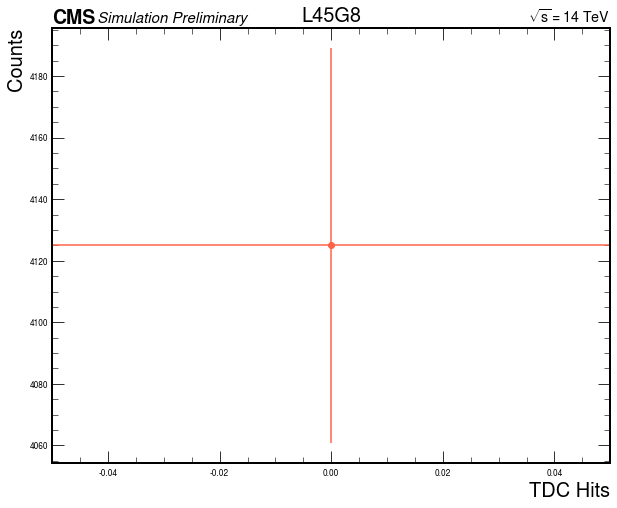

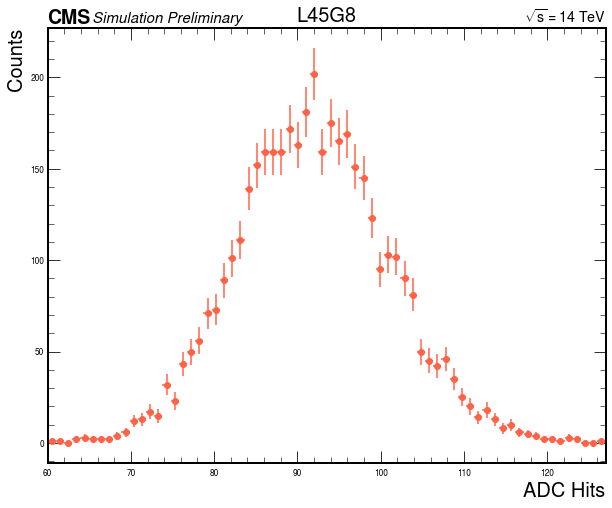

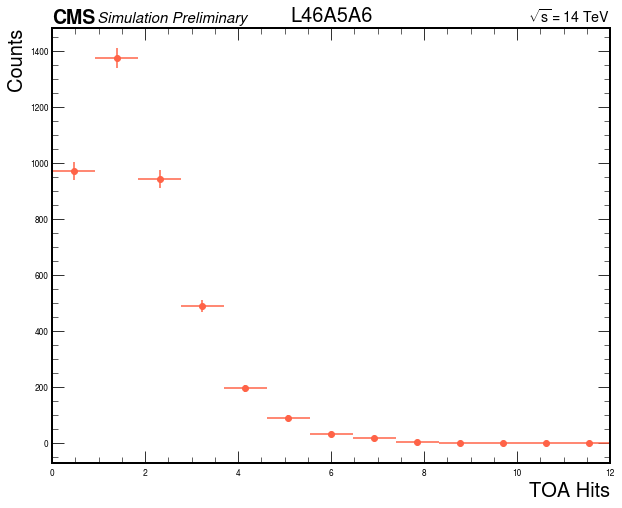

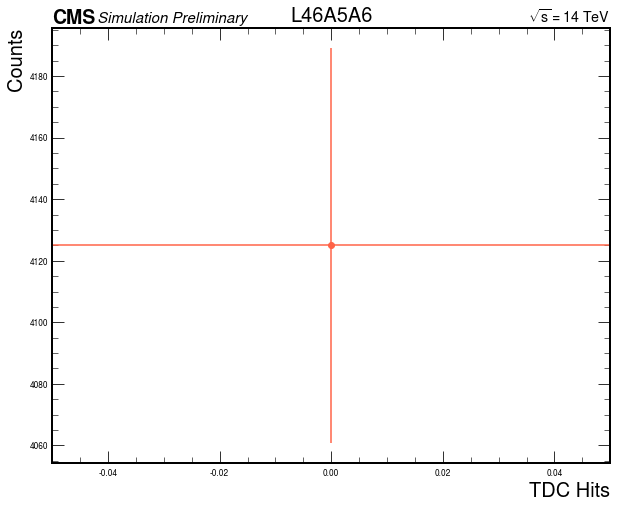

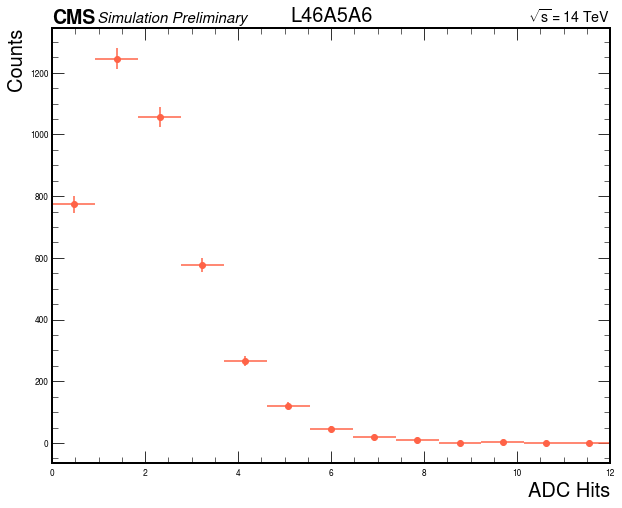

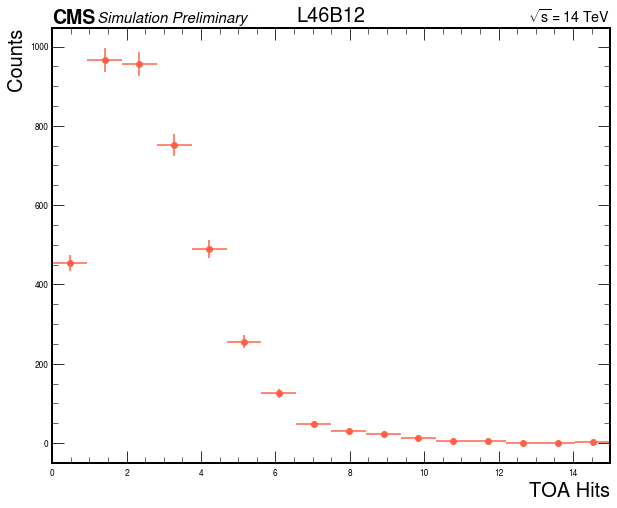

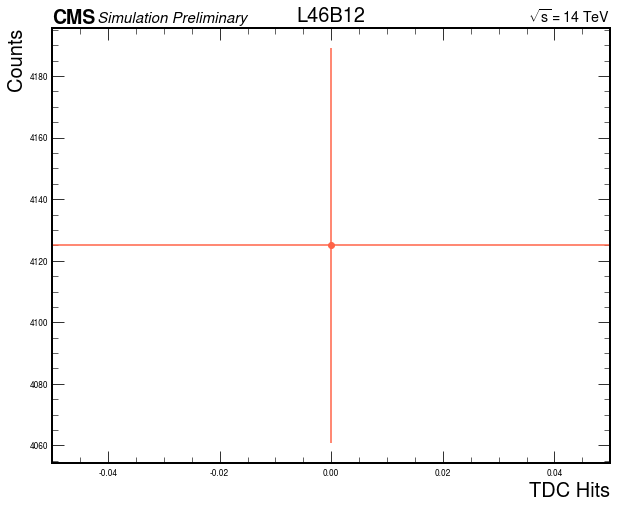

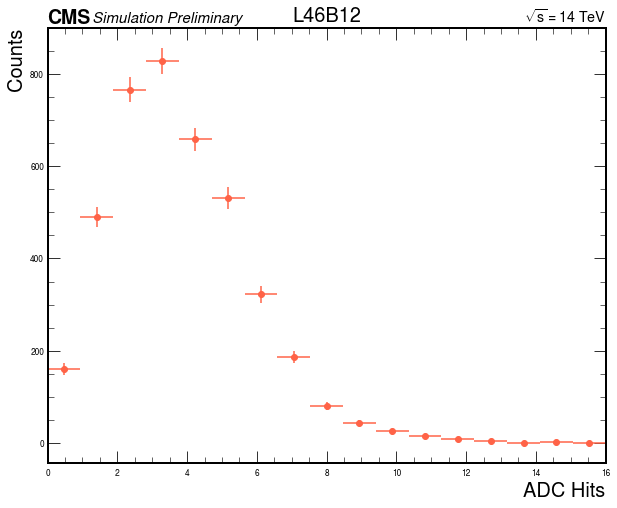

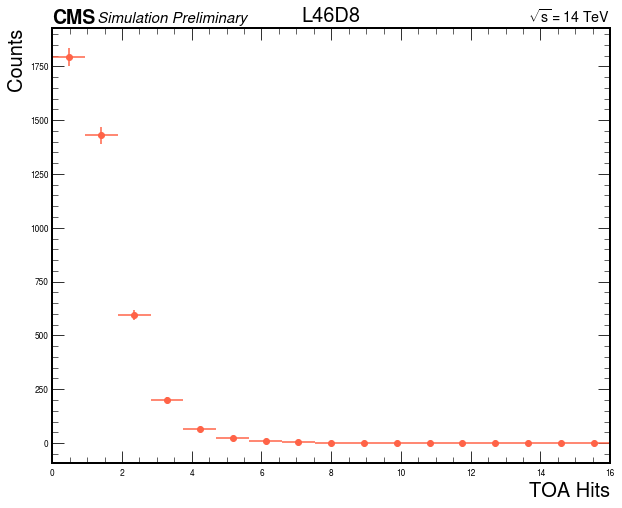

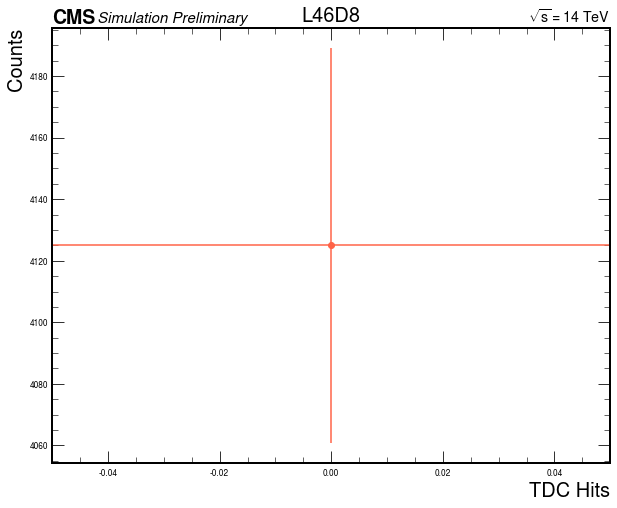

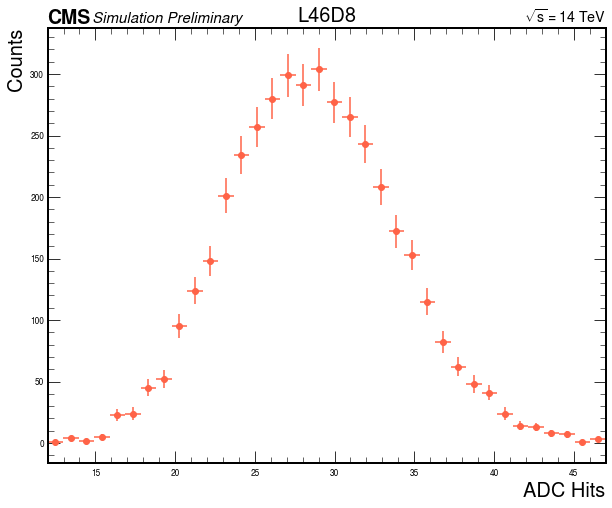

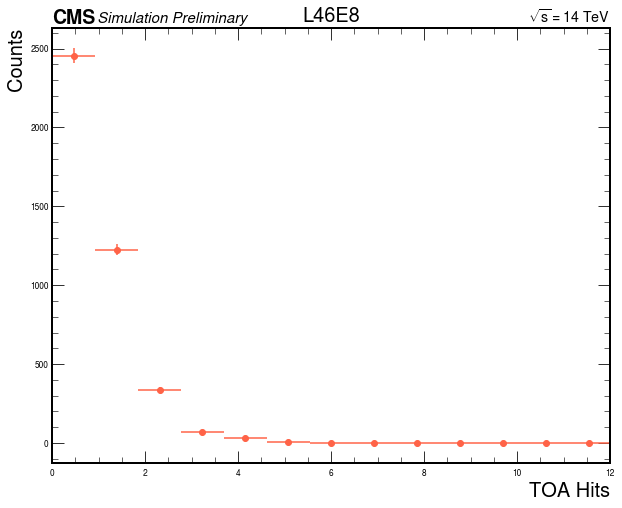

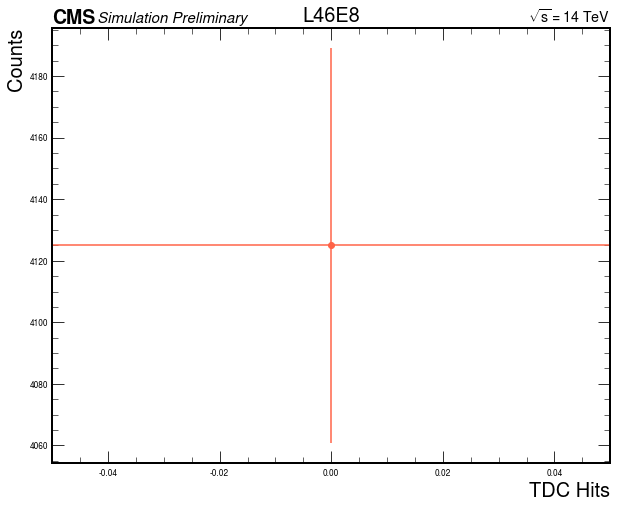

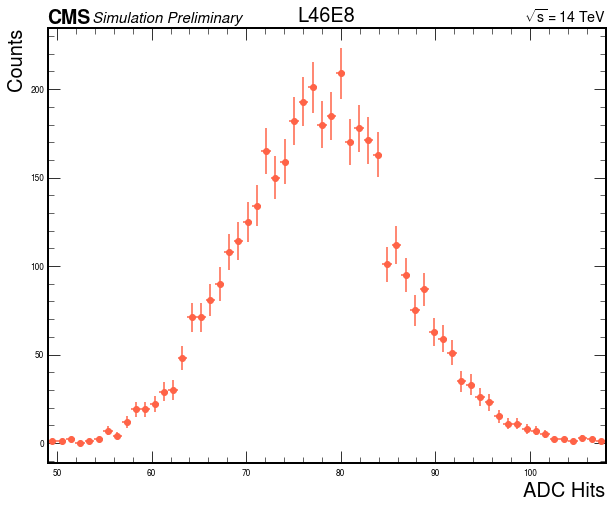

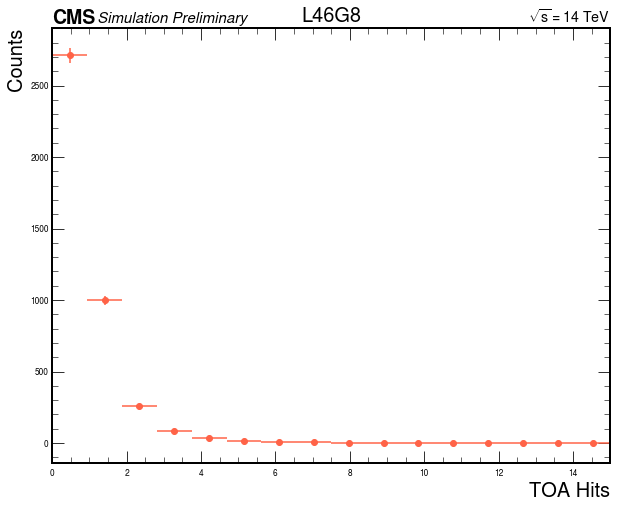

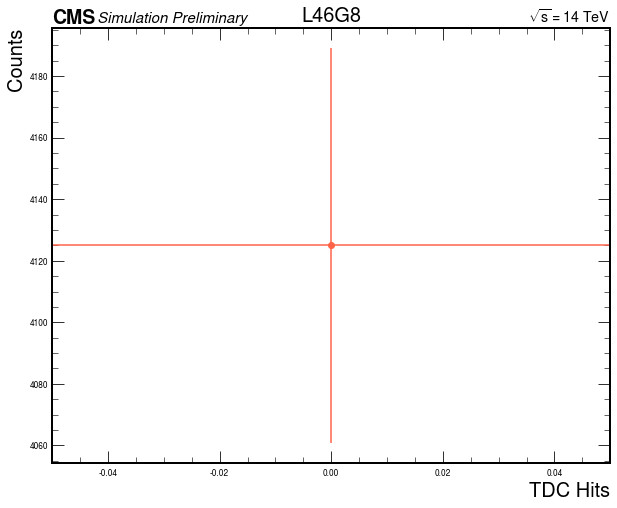

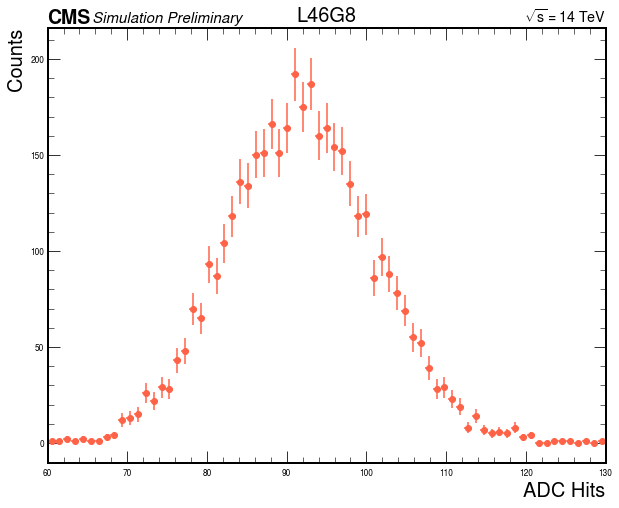

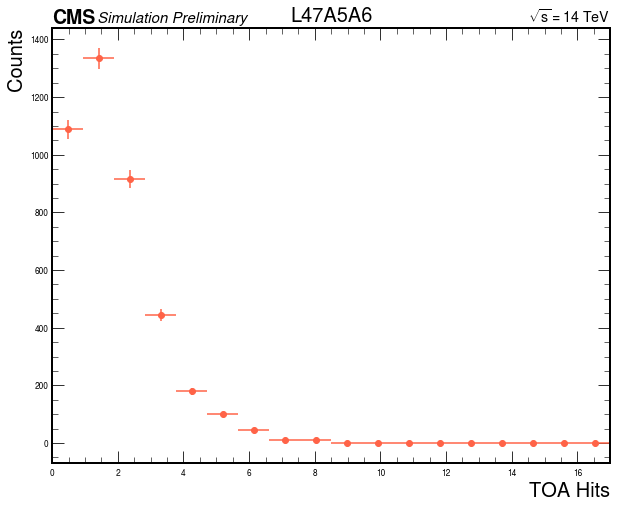

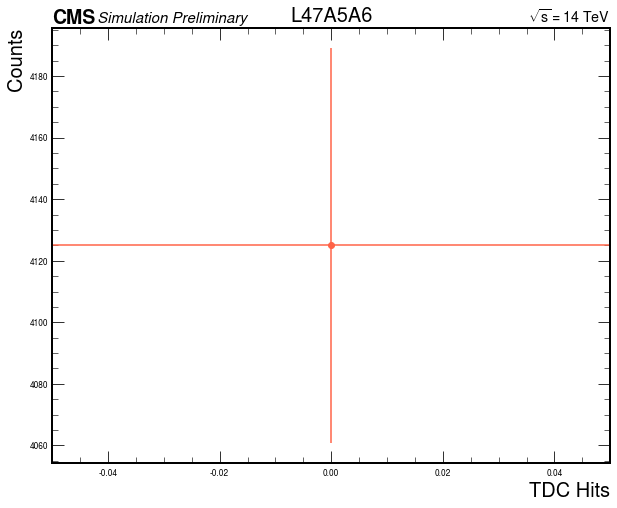

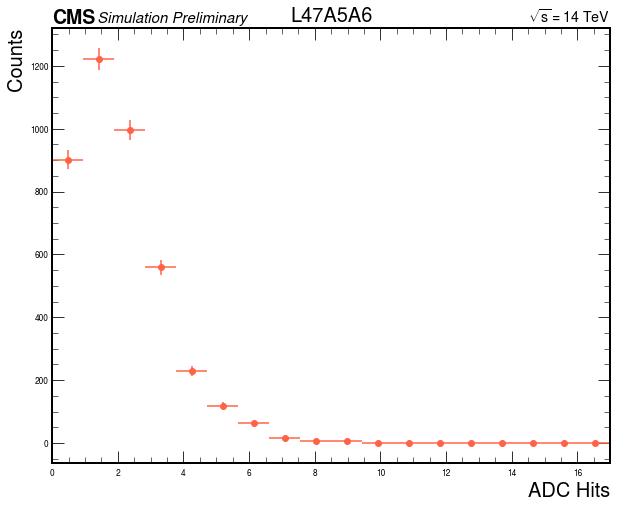

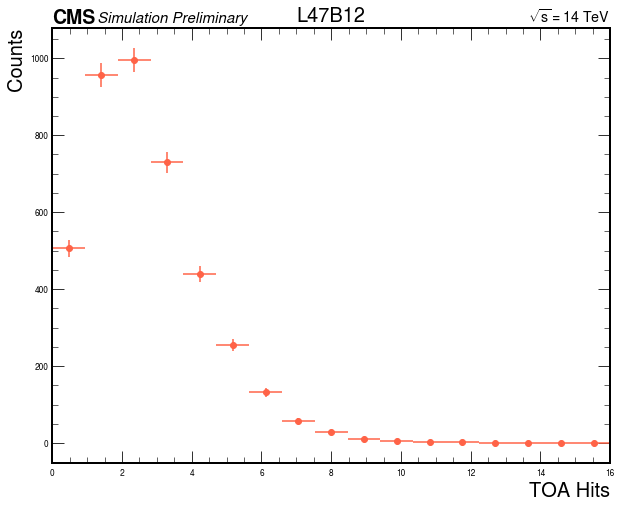

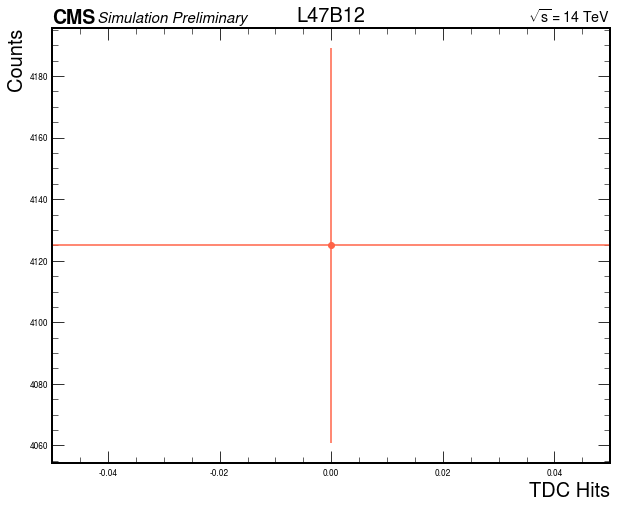

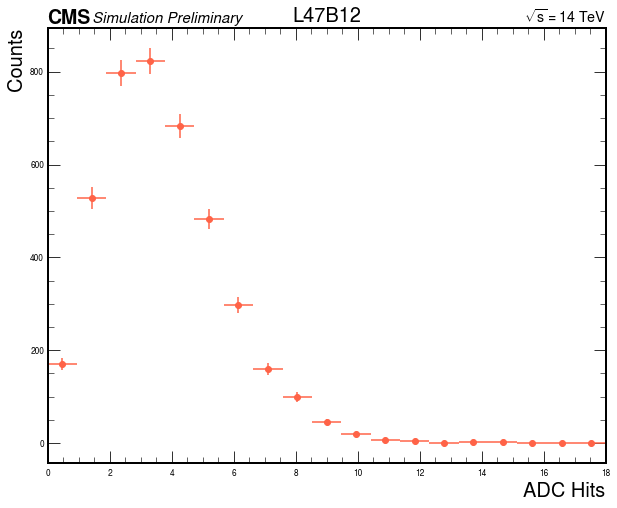

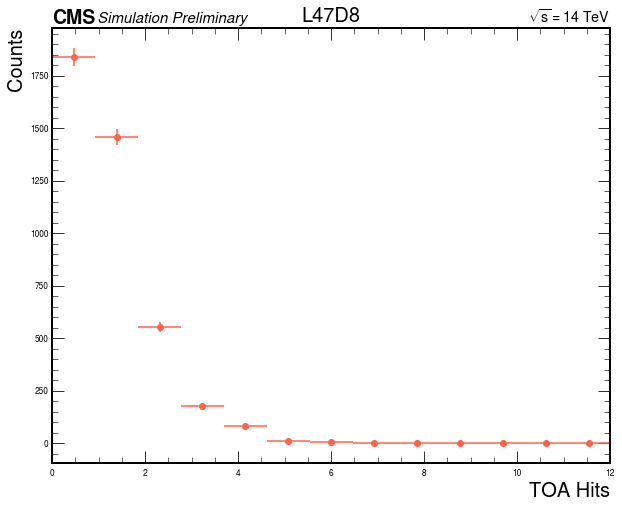

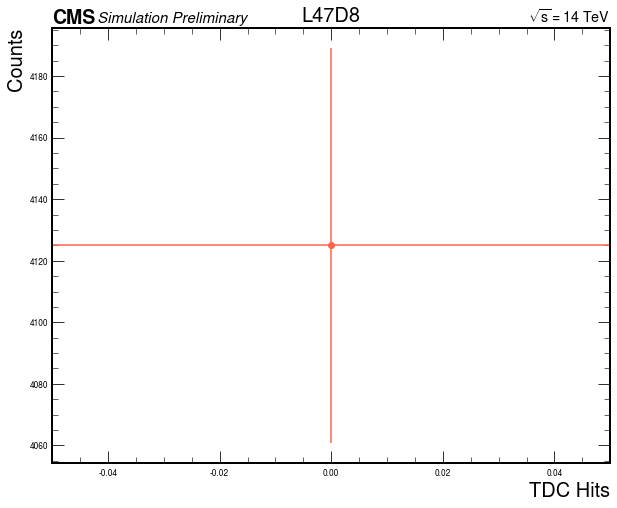

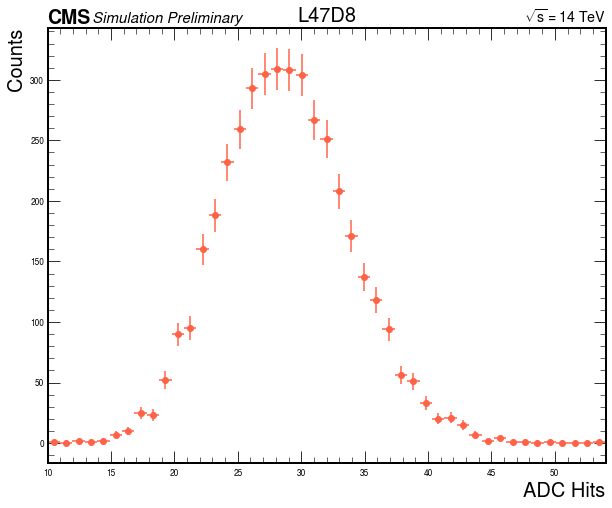

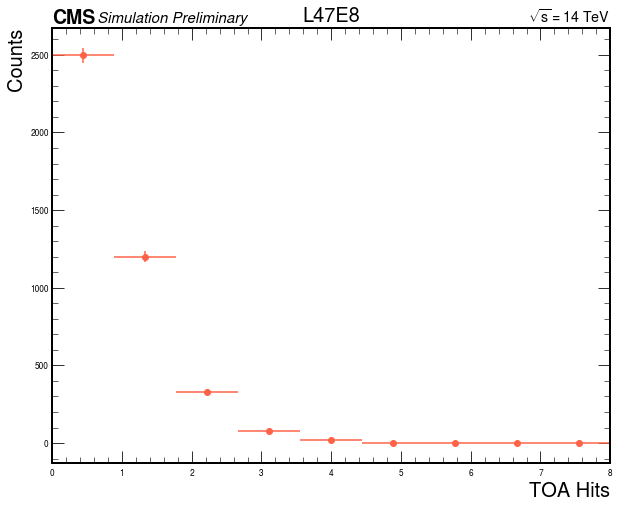

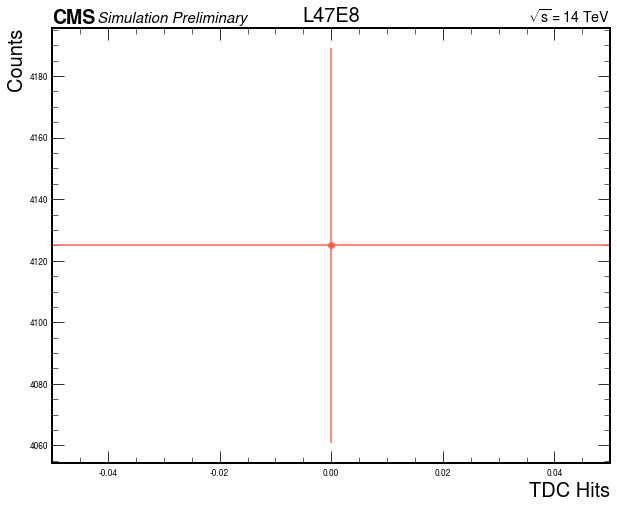

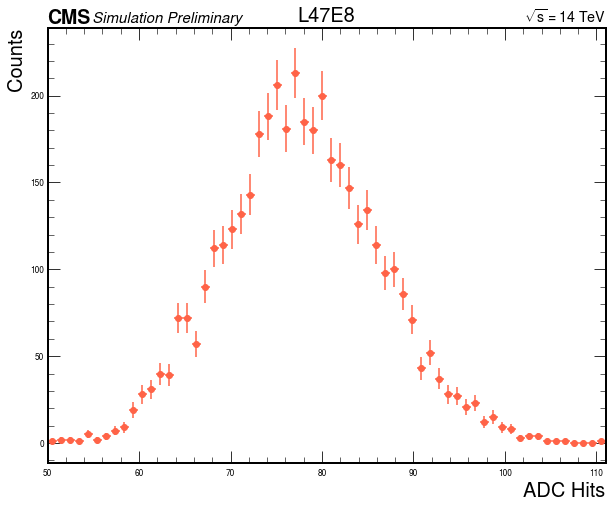

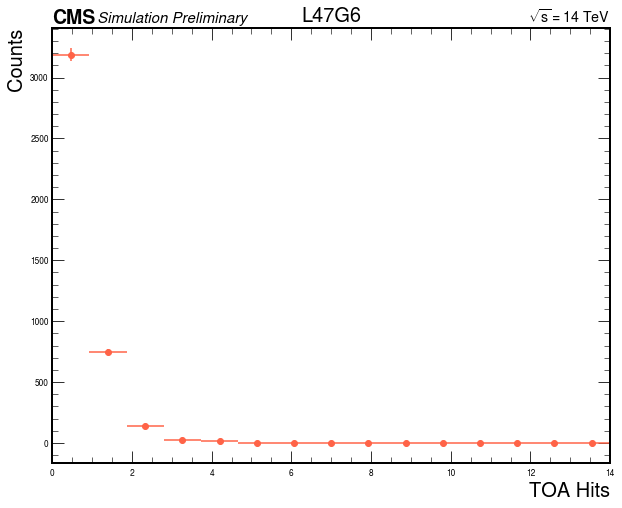

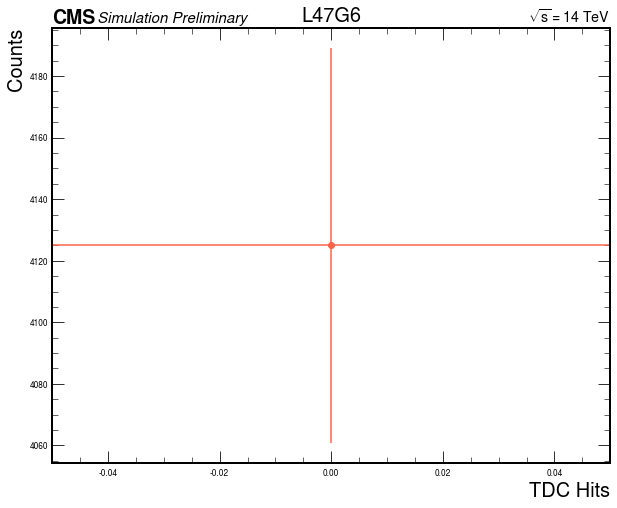

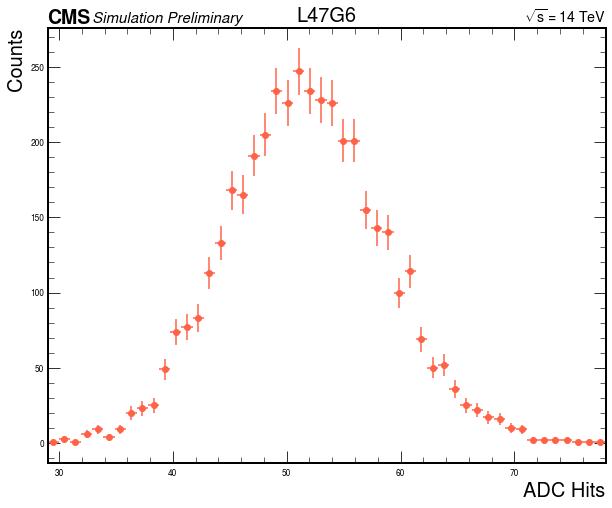

In [10]:
for tb in tileboards:
    name = "L"+str(tb[0])+"_"+tb[1]
    for ivar in vars_to_plot:
        full_name = name+"_"+ivar
        print(full_name)
        plot1DHist(df_tree, full_name, color="#FF6347", output_file_name=full_name)

# Load and plot 2D histograms 

In [37]:
with uproot.open(infile) as f:   
    h2_tdccount = f["ana/tdccount;2"]
    h2_toacount = f["ana/toacount;2"]
    h2_adccount = f["ana/adccount;2"]
    h2_adchitsvspu = f["ana/adchitsvspu;1"]


In [39]:
def plot2DHist(h_, var_, xlabel="Layer", ylabel="Counts", label=None,output_file_name=None):
    
    values = h_.values()
    edges_x = h_.axis('x').edges()
    edges_y = h_.axis('y').edges()
    errors = h_.errors()
    
    #plot
    print(len)
    fig, ax = plt.subplots(figsize=(10, 8))
    hep.hist2dplot(
        values,
        edges_x,
        edges_y,
        #True, #numerical labels 
    )
    
    # Axes titles
#     ax.set_title(
#        "$ \sqrt{s} = 14$ TeV", #, L = 2.3 $fb^{-1}$; \n",
#        fontsize=15,
#     )
    ax.set_title(
       var_, #, L = 2.3 $fb^{-1}$; \n",
       fontsize=20,
    )

    ax.set_xlabel(xlabel, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=20)
    ax.set_xlim(34, 47)
    #ax.set_ylim(0, 20)

    hep.cms.label(
        "Preliminary",
        data=False,
        loc=0,
        ax=ax,
        rlabel="$ \sqrt{s} = 14$ TeV",
        fontsize=15
    )
    
    if output_file_name:
        plt.savefig(plot_dir+output_file_name+".pdf", bbox_inches="tight");



<built-in function len>


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


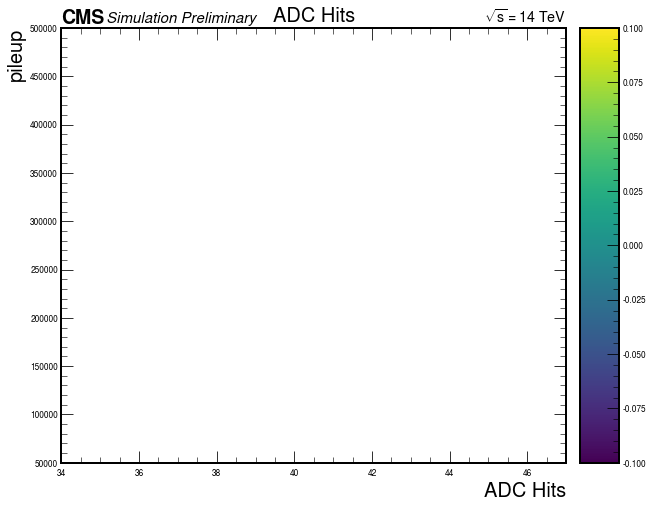

In [40]:
plot2DHist(h2_adchitsvspu, "ADC Hits", xlabel="ADC Hits", ylabel="pileup", output_file_name="h2_toacount")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<built-in function len>


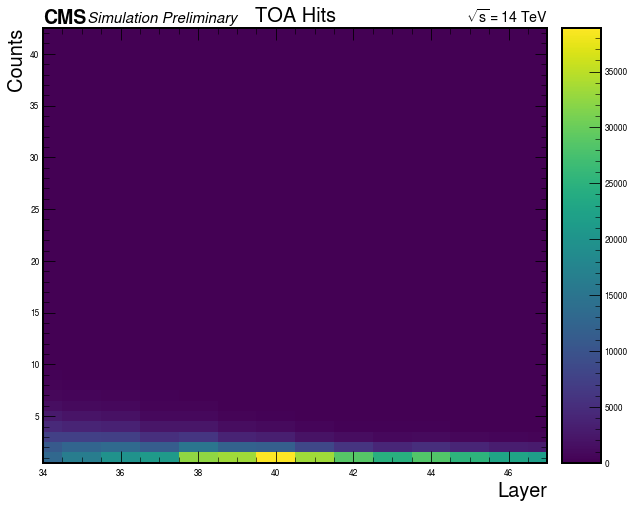

In [13]:
plot2DHist(h2_toacount, "TOA Hits", output_file_name="h2_toacount")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<built-in function len>


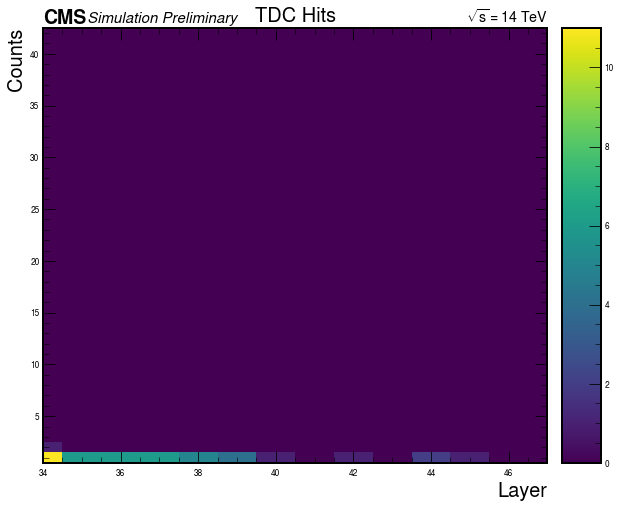

In [14]:
plot2DHist(h2_tdccount, "TDC Hits", output_file_name="h2_tdccount")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<built-in function len>


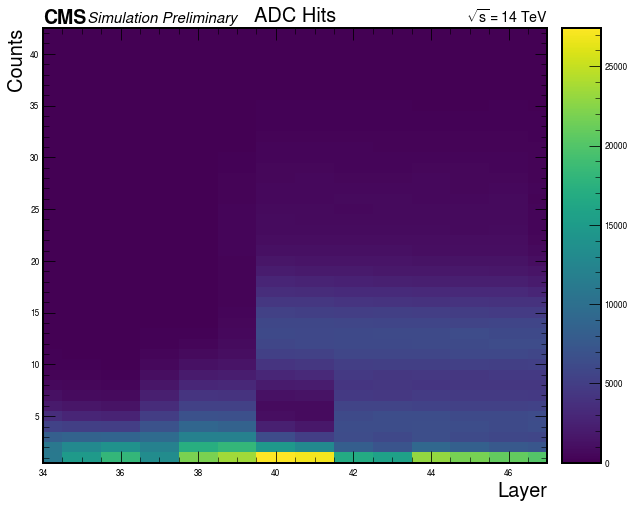

In [15]:
plot2DHist(h2_adccount, "ADC Hits", output_file_name="h2_adccount")

# Profile histograms per layer 

In [ ]:
with uproot.open(infile) as f:   
    hp_tdccount = f["ana/tdccount;1"]
    hp_toacount = f["ana/toacount;1"]
    hp_adccount = f["ana/adccount;1"]

In [34]:
def plotProfHist(h_, var_,label=None,output_file_name=None):
    
    # get info from hist 
    values = h_.values()
    edges = h_.axis('x').edges()
    errors = h_.errors()

    #plot
    fig, ax = plt.subplots(figsize=(10, 8))
    hep.histplot(
        values,
        edges,
        yerr=True
    )
    
#     # title
#     ax.set_title(
#        var_, #, L = 2.3 $fb^{-1}$; \n",
#        fontsize=20,
#     )

    # axes
    ax.set_ylabel(var_, fontsize=20)
    ax.set_xlabel("Layer", fontsize=20)
    ax.set_xlim(33, 48)
    #ax.set_ylim(0, 20)

    # legend 
    #ax.legend(fontsize=15)
    
    # cms label
    hep.cms.label(
        "Preliminary",
        data=False,
        loc=0,
        ax=ax,
        rlabel="$ \sqrt{s} = 14$ TeV",
        fontsize=15
    )
    
    # save output
    if output_file_name:
        plt.savefig(plot_dir+output_file_name+".pdf", bbox_inches="tight");



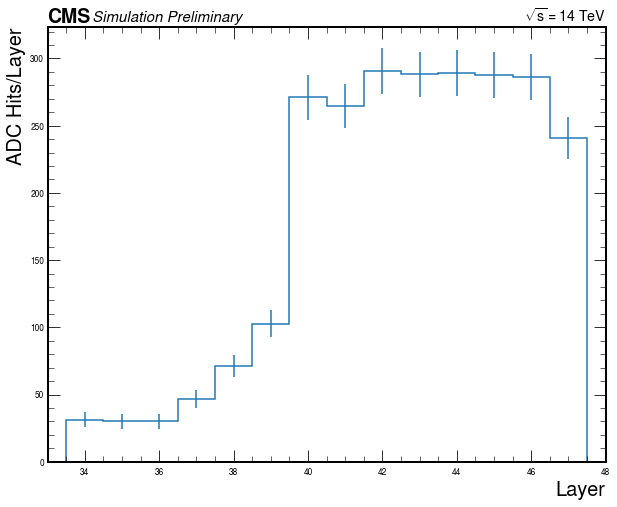

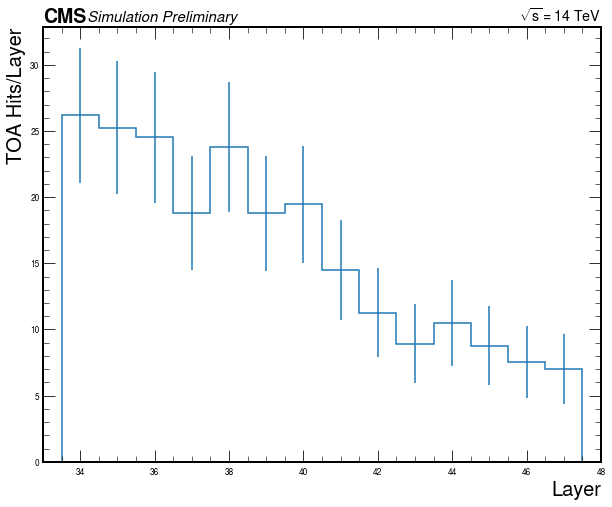

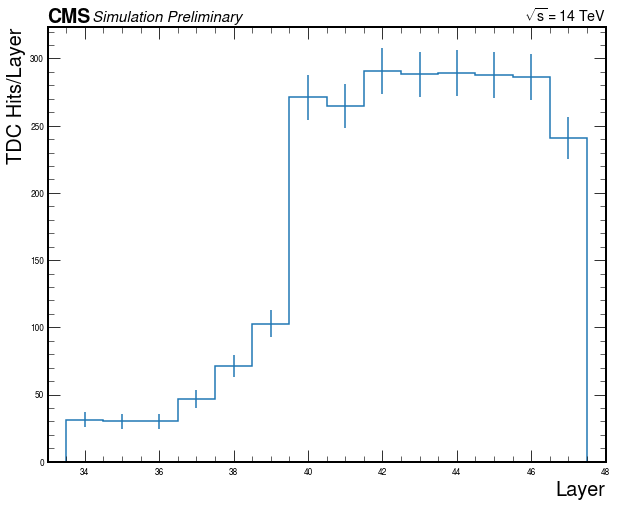

In [35]:
plotProfHist(hp_adccount, "ADC Hits/Layer",output_file_name="hp_adccount")
plotProfHist(hp_toacount, "TOA Hits/Layer",output_file_name="hp_toacount")
plotProfHist(hp_adccount, "TDC Hits/Layer",output_file_name="hp_tdccount")
    